# INTRODUCTION

Ce fichier est une association du travail conjoint réalisé au préalable sur Google Colab par Nesrine, David et Maxime. Il a pour objectif de réaliser, dans un premier temps, l'analyse des variables catégorielles et quantitatives du dataset 'bank.csv', puis ensuite d'effectuer un preprocessing des données en vue de sélectionner les variables nous permettant d'élaborer notre modèle de prédiction. Il s'agit d'une problématique de classification. 

# IMPORT DES PRINCIPALES FONCTIONS

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt


# CHARGEMENT DU DATASET ET VISION GENERALE DES DONNEES

In [2]:
df = pd.read_csv('bank.csv')

# Visualisation des premieres valeurs
display(df.head())

# info sur toutes les variables
print(df.info())


age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


# INVENTAIRE DES DONNEES

**Le dataset est constitué de 11162 observations contenant 17 variables :**

- 7 variables quantitatives

- 10 variables categorielles (dont deposit pour l'evaluation) mais certaines devront etre transformé en variables quantitatives   ou en variables binaires.


**Il n'y a pas de valeurs manquantes.**

**Ci-dessous une liste exhaustive des différentes variables :**

- age (variable quantitative) : Age du client

- job (variable categorielle) : Type d'emploi du client

- marital (variable categorielle) : Status marital

- education (variable categorielle) : Niveau d'étude

- balance (variable quantitative) : Solde du compte

- default (variable categorielle) : Le client a-t-il fait defaut sur un emprunt?

- housing (variable categorielle) : Emprunt Immobilier

- loan (variable categorielle) : Emprunt à la consommation

- contact (variable categorielle) : Moyen de communication utilisé

- day (variable quantitative): Jour du dernier contact

- month (variable categorielle) : Mois du dernier contact( au format texte)

- duration (variable quantitative): Duree du dernier contact en secondes

- campaign (variable quantitative): Nombre d'appels pendant ma campagne

- pdays(variable quantitative): Nombre de jour depuis la campagne precedente

- previous(variable quantitative): Nombre d'appels pendant les campagnes precedentes

- poutcome (variable categorielle) : Résultat de la campagne precedente

- Deposit(variable categorielle): le client a-t-il souscrit? il s'agit de la variable cible


# ANALYSE DES VARIABLES CATEGORIELLES

**La fonction cat-scan ci-dessous permet d'analyser intégralement chaque variable catégorielle du dataset (df) en spécifiant pour chacune d'elles :**

- Sa modalité la plus fréquente ;

- Un tableau constitué de 3 colonnes dans lesquelles chaque modalité de cette variable est analysée selon son nombre et la part
  qu'elle y représente ; 
  
- Une analyse statistique entre elle et la variable cible deposit dans laquelle on présente non seulement la p-value mais
  également le V de Cramer afin de correctement mesurer leur niveau de corrélation. Une interprétation des résultats est         également apportée ; 
  
- Et enfin un graphique dans lequel la distribution des modalités de la variable est représentée en fonction de la variable       cible.


In [3]:
def cat_scan(var):
    print('\nLa modalité la plus présente pour la variable', var, 'est : ', df[var].mode()[0])
    
    scan = pd.DataFrame(columns=['variable', 'count', 'pourcent'])
    scan['variable'] = df[var].value_counts().index.tolist()
    scan['count'] = df[var].value_counts().values.tolist()
    scan['pourcent'] = df[var].value_counts(normalize = True).round(2).values.tolist()
    display(scan)
    
    table = pd.crosstab(df[var], df.deposit)
    resultats_test = chi2_contingency(table)
    # la statistique du test du khi2 avec la table de contingence est le premier indice
    statistique = resultats_test[0]
    # la p-value du test du khi2 avec la table de contingence est le deuxième indice
    p_valeur = resultats_test[1]
    # les degrés de liberté du test du khi2 avec la table de contingence est le troisième indice
    degre_liberte = resultats_test[2]
    # print(resultats_test)
    print('\nCorrélation variables deposit -', var, ': \n\nStatistique :',statistique,',', 'p-value :', p_valeur,',', 'degré_de_liberté :', degre_liberte,)
    # Recherche du V de Cramer :
    stat_chi2 = chi2_contingency(table)[0]
    # k = nombre de lignes
    k = table.shape[0]
    # r = nombre de colonnes
    r = table.shape[1]
    # N = nombre d'observations du jeu de données (nombre de lignes de df)
    N = df.shape[0]
    # On applique ensuite la formule de phi pour trouver le V de cramer
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    v_cramer = np.sqrt(phi/min(k_corr - 1,r_corr - 1))
    # On a tous les éléments pour calculer le v de cramer
    print('V de Cramer :',v_cramer,)
    if resultats_test[1] < 0.5 and v_cramer < 0.5 :
        print('On rejette H0 car les deux variables ne sont pas indépendantes.\nCependant, leur corrélation est assez faible selon le V de Cramer\n')
    elif resultats_test[1] < 0.5 and v_cramer > 0.5 :
        print('On rejette H0 car les deux variables ne sont pas indépendantes.\nDe plus, leur corrélation est assez faible selon le V de Cramer\n')
    elif resultats_test[1] > 0.5 and v_cramer < 0.5 : 
        print('On accepte H0 et les deux variables ne sont pas significativement dépendantes.\nDe plus, leur corrélation est assez faible selon le V de Cramer\n')
    else :    
        print('On accepte H0 et les deux variables ne sont pas significativement dépendantes.\nMalgré tout, leur corrélation est assez forte selon le V de Cramer\n')
 
    # Code pour que les graphiques aient la même hauteur
    plt.figure(figsize = (14, df[var].unique().shape[0]/2))
    
    plt.title('Graphique représentant la distribution de la variable ' + var + ' en fonction de la variable cible deposit\n')
    sns.countplot(y = var, hue = 'deposit', data = df);
    plt.xlabel('occurence')
    plt.legend()
    # Enregistrement des images dans le répertoire courant
    filename = 'Histogramme_'+var+'.png'
    plt.savefig(filename, dpi = 600, bbox_inches = "tight")
    plt.show()
   

**Application de la fonction cat-scan à chacune des variables catégorielles du dataset df**


La modalité la plus présente pour la variable job est :  management


variable  count  pourcent
0      management   2566      0.23
1     blue-collar   1944      0.17
2      technician   1823      0.16
3          admin.   1334      0.12
4        services    923      0.08
5         retired    778      0.07
6   self-employed    405      0.04
7         student    360      0.03
8      unemployed    357      0.03
9    entrepreneur    328      0.03
10      housemaid    274      0.02
11        unknown     70      0.01


Corrélation variables deposit - job : 

Statistique : 378.0752558664989 , p-value : 2.741689587081072e-74 , degré_de_liberté : 11
V de Cramer : 0.1813532820862077
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



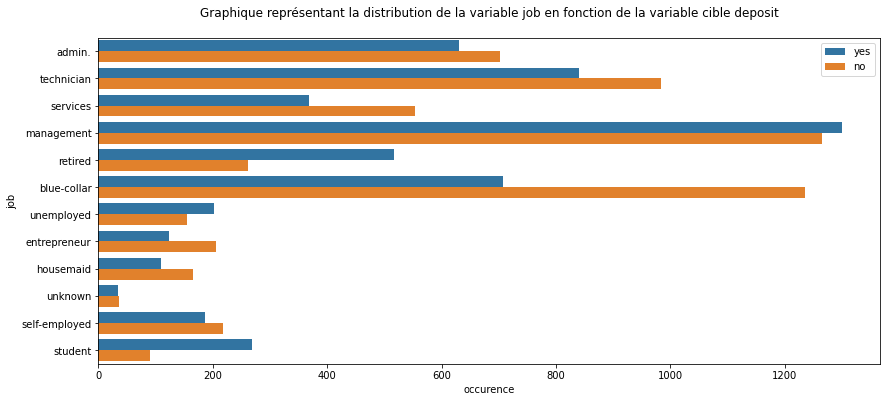

In [4]:
cat_scan('job')


La modalité la plus présente pour la variable education est :  secondary


variable  count  pourcent
0  secondary   5476      0.49
1   tertiary   3689      0.33
2    primary   1500      0.13
3    unknown    497      0.04


Corrélation variables deposit - education : 

Statistique : 122.77008967211442 , p-value : 1.9534186354212715e-26 , degré_de_liberté : 3
V de Cramer : 0.1035910291517223
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



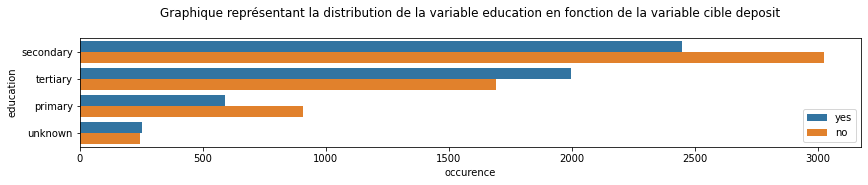

In [5]:
cat_scan('education')


La modalité la plus présente pour la variable contact est :  cellular


variable  count  pourcent
0   cellular   8042      0.72
1    unknown   2346      0.21
2  telephone    774      0.07


Corrélation variables deposit - contact : 

Statistique : 736.6866796046972 , p-value : 1.0728032438445805e-160 , degré_de_liberté : 2
V de Cramer : 0.25656622110819854
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



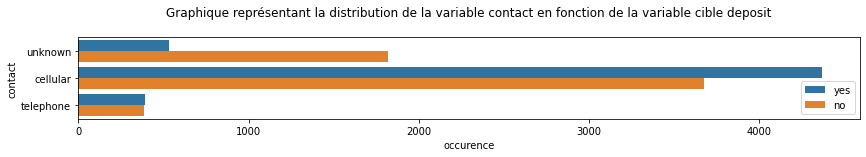

In [6]:
cat_scan('contact')


La modalité la plus présente pour la variable marital est :  married


variable  count  pourcent
0   married   6351      0.57
1    single   3518      0.32
2  divorced   1293      0.12


Corrélation variables deposit - marital : 

Statistique : 109.58335610012479 , p-value : 1.600576988089358e-24 , degré_de_liberté : 2
V de Cramer : 0.09817945795517834
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



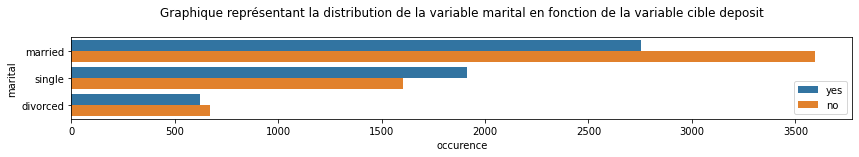

In [7]:
cat_scan('marital')


La modalité la plus présente pour la variable housing est :  no


variable  count  pourcent
0       no   5881      0.53
1      yes   5281      0.47


Corrélation variables deposit - housing : 

Statistique : 463.1892407533161 , p-value : 9.724394114495535e-103 , degré_de_liberté : 1
V de Cramer : 0.20349714531691168
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



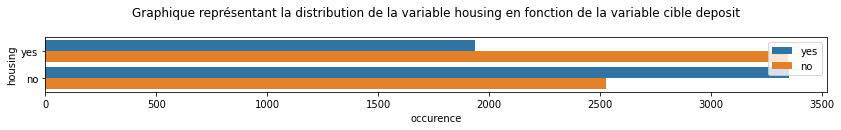

In [8]:
cat_scan('housing')


La modalité la plus présente pour la variable loan est :  no


variable  count  pourcent
0       no   9702      0.87
1      yes   1460      0.13


Corrélation variables deposit - loan : 

Statistique : 135.83217051738103 , p-value : 2.171286879630289e-31 , degré_de_liberté : 1
V de Cramer : 0.10991198880407216
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



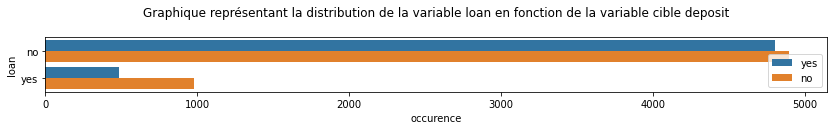

In [9]:
cat_scan('loan')


La modalité la plus présente pour la variable month est :  may


variable  count  pourcent
0       may   2824      0.25
1       aug   1519      0.14
2       jul   1514      0.14
3       jun   1222      0.11
4       nov    943      0.08
5       apr    923      0.08
6       feb    776      0.07
7       oct    392      0.04
8       jan    344      0.03
9       sep    319      0.03
10      mar    276      0.02
11      dec    110      0.01


Corrélation variables deposit - month : 

Statistique : 1046.7745027840656 , p-value : 1.6420829584486923e-217 , degré_de_liberté : 11
V de Cramer : 0.304635736793811
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



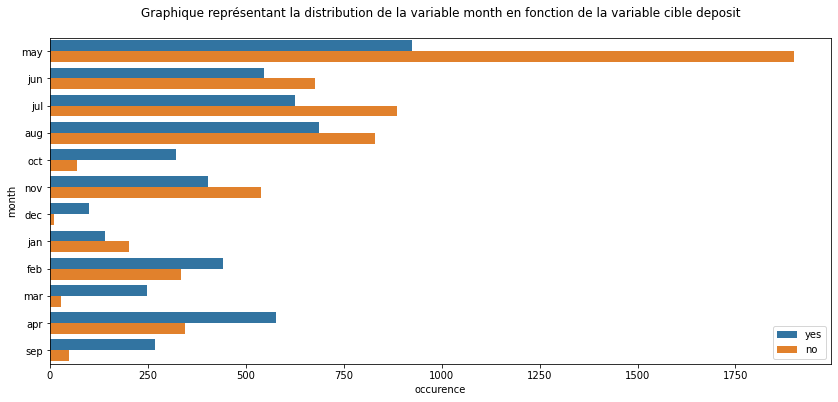

In [10]:
cat_scan('month')


La modalité la plus présente pour la variable poutcome est :  unknown


variable  count  pourcent
0  unknown   8326      0.75
1  failure   1228      0.11
2  success   1071      0.10
3    other    537      0.05


Corrélation variables deposit - poutcome : 

Statistique : 1004.635780185333 , p-value : 1.7761850102620281e-217 , degré_de_liberté : 3
V de Cramer : 0.29957343855644286
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



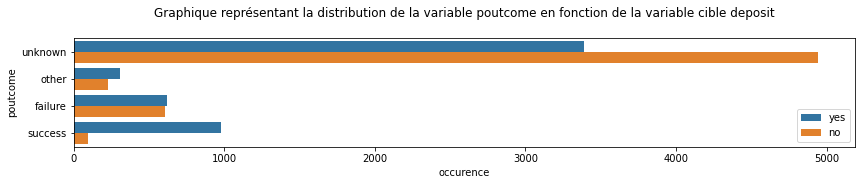

In [11]:
cat_scan('poutcome')


La modalité la plus présente pour la variable default est :  no


variable  count  pourcent
0       no  10994      0.98
1      yes    168      0.02


Corrélation variables deposit - default : 

Statistique : 17.808573693473093 , p-value : 2.4428001791928345e-05 , degré_de_liberté : 1
V de Cramer : 0.038807236869287685
On rejette H0 car les deux variables ne sont pas indépendantes.
Cependant, leur corrélation est assez faible selon le V de Cramer



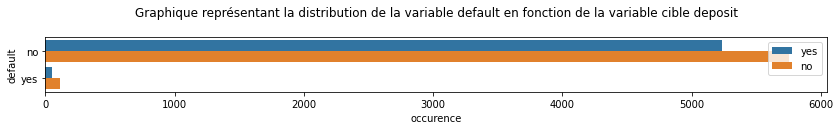

In [12]:
cat_scan('default')

# ANALYSE DES VARIABLES QUANTITATIVES

## Présence de valeurs aberrantes 


**Nous allons présenter, dans le tableau ci-dessous, une analyse globale de la présence de valeurs aberrantes au sein des variables quantitatives par le biais :**

- de l'écart entre la moyenne et la médiane
- l'écart entre les quantiles
- l'écart entre le min et le max


In [3]:
# Pour commencer, on transforme la variable cible en variable indicatrice. 
from sklearn.preprocessing import LabelEncoder
L_E = LabelEncoder()
df.deposit = L_E.fit_transform(df.deposit)

# On regroupe les variables quantitatives dans un dataframe pour une analyse plus simple
data_quant = df.select_dtypes(include=['int64','float64'])

# On analyse la présence de valeurs aberrantes par l'écart entre la moyenne et la médiane
stats = pd.DataFrame(data_quant.mean().round(2), columns = ['moyenne'])
stats['médiane'] = data_quant.median().round(2)
stats['diff_médiane_moyenne'] = abs((data_quant.mean() - data_quant.median())).round(2)
ecart_type = data_quant.std()
stats['écart-type'] = ecart_type

# On analyse la présence de valeurs aberrantes par l'écart entre les quantiles
stats[['quantile_1', 'quantile_2', 'quantile_3']] = data_quant.quantile(q=[0.25, 0.5, 0.75]).transpose()

# Enfin, on analyse la présence de valeurs aberrantes avec l'écart entre le min et le max
stats['min'] = data_quant.min()
stats['max'] = data_quant.max()
stats['Ecart max-min'] = data_quant.max() - data_quant.min()

# On affiche le tableau
stats

moyenne  médiane  diff_médiane_moyenne   écart-type  quantile_1  \
age         41.23     39.0                  2.23    11.913369        32.0   
balance   1528.54    550.0                978.54  3225.413326       122.0   
day         15.66     15.0                  0.66     8.420740         8.0   
duration   371.99    255.0                116.99   347.128386       138.0   
campaign     2.51      2.0                  0.51     2.722077         1.0   
pdays       51.33     -1.0                 52.33   108.758282        -1.0   
previous     0.83      0.0                  0.83     2.292007         0.0   

          quantile_2  quantile_3   min    max  Ecart max-min  
age             39.0       49.00    18     95             77  
balance        550.0     1708.00 -6847  81204          88051  
day             15.0       22.00     1     31             30  
duration       255.0      496.00     2   3881           3879  
campaign         2.0        3.00     1     63             62  
pdays           -1.0       20.75    -1    854            855  
previous         0.0        1.00     0     58             58

**On constate la présence de valeurs aberrantes pour 3 variables quantitatives, à savoir 'balance', 'duration', 'pdays'.**


**Comme nous l'avons effectué avec les variables qualitatives, nous avons également décidé d’élaborer une fonction afin d'analyser automatiquement la distribution ainsi que la présence de valeurs aberrantes dans toutes les variables quantitatives de notre jeu de données : il s'agit de la fonction num_scan. A la différence de la précédente, elle a pour objectif de représenter graphiquement les valeurs aberrantes de chacune des variables quantitatives et également de permettre l’analyse de leur distribution. Elle se constitue :**

- d'un tableau présentant les principales statistiques descriptives de chaque variable ;
- d'un boxplot représentant la variable concernée en fonction de la variable cible deposit ;
- d'un boxenplot de ladite variable, encore en fonction de notre variable cible ;
- Et enfin, d’un histogramme permettant de représenter la distribution de la variable en question, toujours en fonction de notre variable cible deposit.


In [14]:
def num_scan(var):
    display(pd.DataFrame(df[var].describe()))
    
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111)
    plt.title('BoxenPlot de la variable ' + var + ' par rapport à la variable deposit\n')
    sns.boxenplot(y = var, x = 'deposit', data = df, ax = ax)
    # Enregistrement du boxenplot dans le répertoire courant
    filename = 'BoxenPlot_' + var + '.png'
    plt.savefig(filename, dpi = 1000, bbox_inches = "tight")
    
    fig = plt.figure(figsize = (15, 4))
    ax = fig.add_subplot(111)
    plt.title('Diagramme en boîte de la variable ' + var + ' par rapport à la variable deposit\n')
    sns.boxplot(x = var, hue = "deposit", data = df, ax = ax)
    # Enregistrement du boxplot dans le répertoire courant
    filename = 'Boxplot_' + var + '.png'
    plt.savefig(filename, dpi = 1000, bbox_inches = 'tight')
    
    plt.figure(figsize = (15, 4))
    plt.title('Histogramme représentant la distribution de la variable ' + var + ' en fonction de la variable cible deposit\n')
    ax = sns.histplot(x = var , bins = 30, data =  df, hue = 'deposit', kde = True, multiple = 'dodge' )
    plt.setp(ax.get_xticklabels(), rotation = 30)
    plt.xlabel(var)
    plt.ylabel('occurence')
    plt.legend()
    # Enregistrement de l'histogramme dans le répertoire courant
    filename = 'Histogramme_' + var + '.png'
    plt.savefig(filename, dpi = 600, bbox_inches = "tight")
    

**Application de la fonction num-scan à chacune des variables quantitatives du dataset df**

age
count  11162.000000
mean      41.231948
std       11.913369
min       18.000000
25%       32.000000
50%       39.000000
75%       49.000000
max       95.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


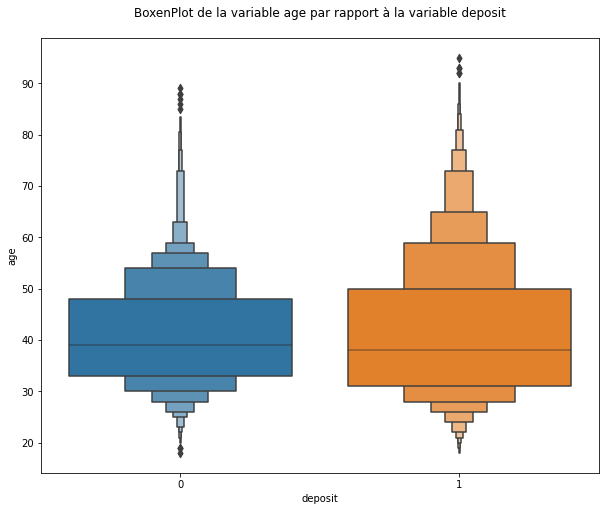

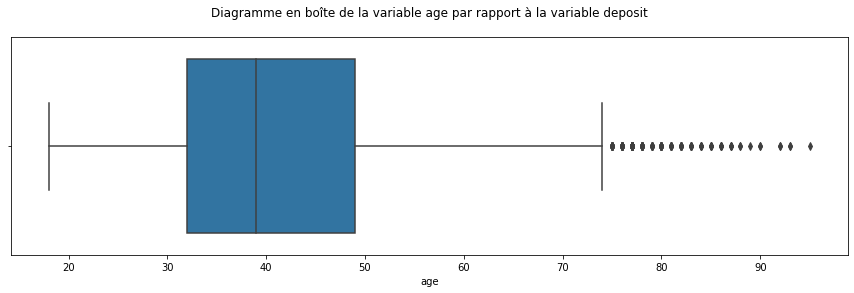

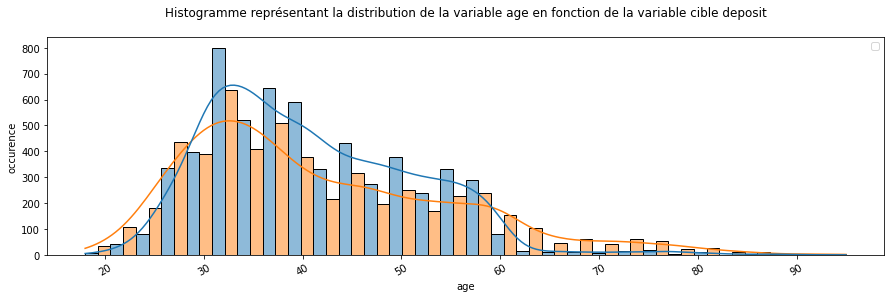

In [15]:
num_scan('age')

duration
count  11162.000000
mean     371.993818
std      347.128386
min        2.000000
25%      138.000000
50%      255.000000
75%      496.000000
max     3881.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


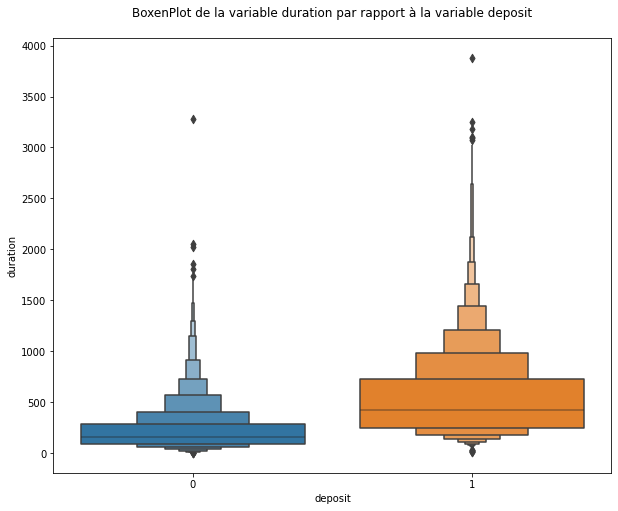

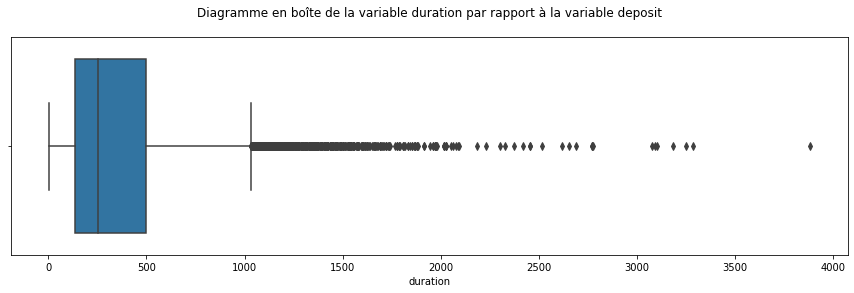

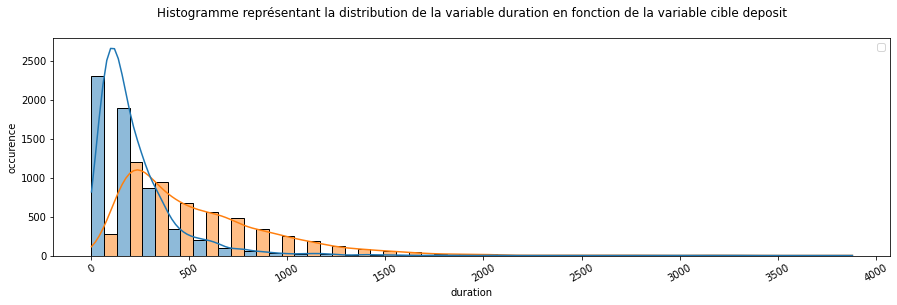

In [16]:
num_scan('duration')

pdays
count  11162.000000
mean      51.330407
std      108.758282
min       -1.000000
25%       -1.000000
50%       -1.000000
75%       20.750000
max      854.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


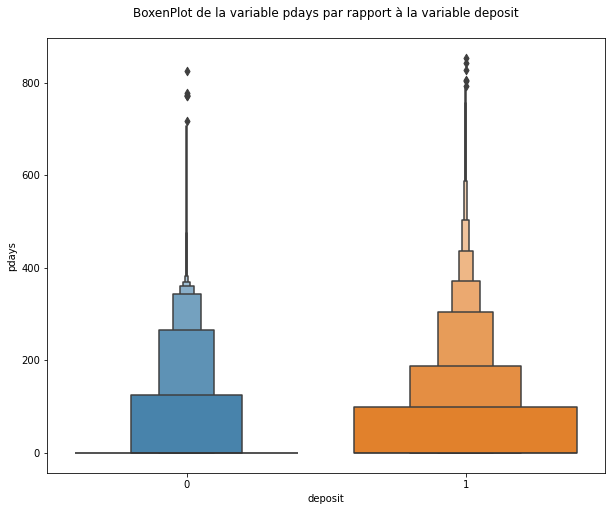

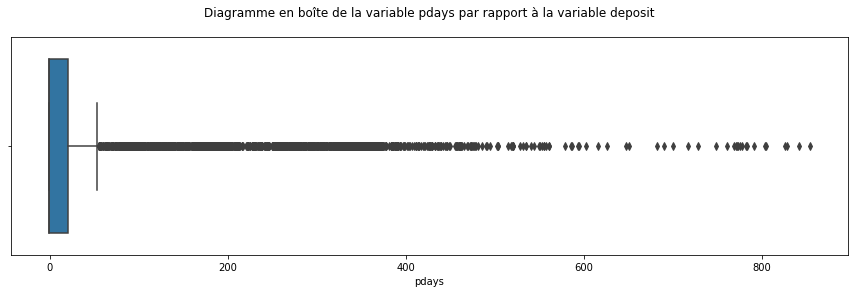

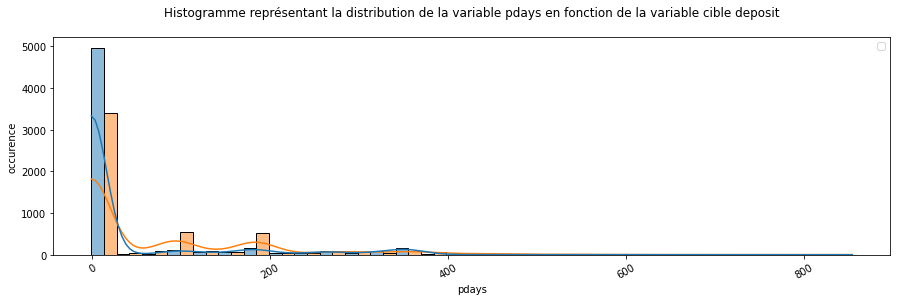

In [17]:
num_scan('pdays')

balance
count  11162.000000
mean    1528.538524
std     3225.413326
min    -6847.000000
25%      122.000000
50%      550.000000
75%     1708.000000
max    81204.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


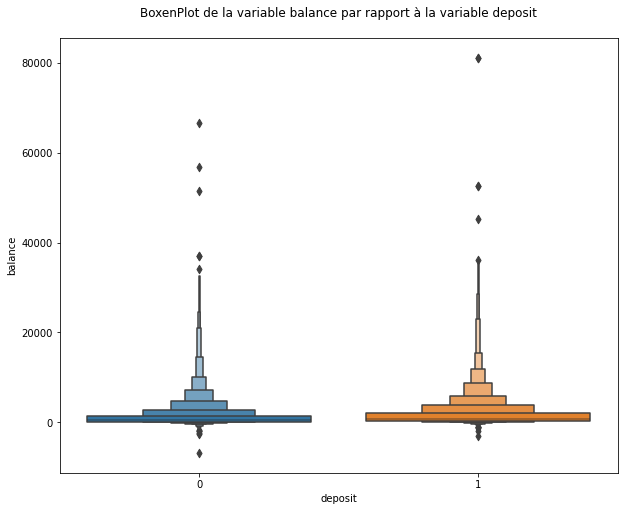

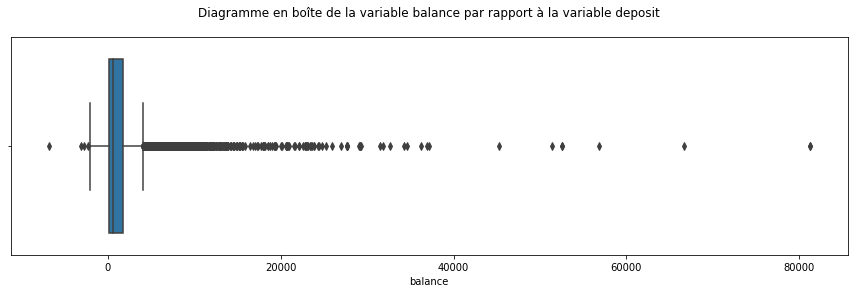

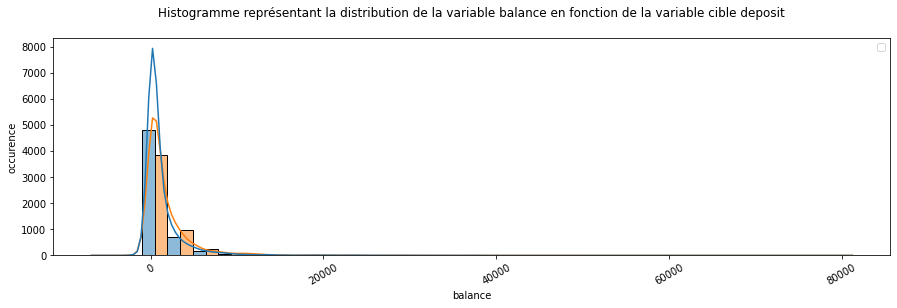

In [18]:
num_scan('balance')

day
count  11162.000000
mean      15.658036
std        8.420740
min        1.000000
25%        8.000000
50%       15.000000
75%       22.000000
max       31.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


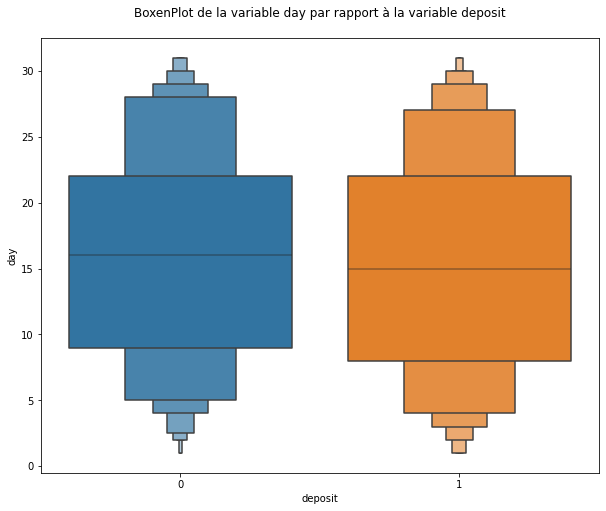

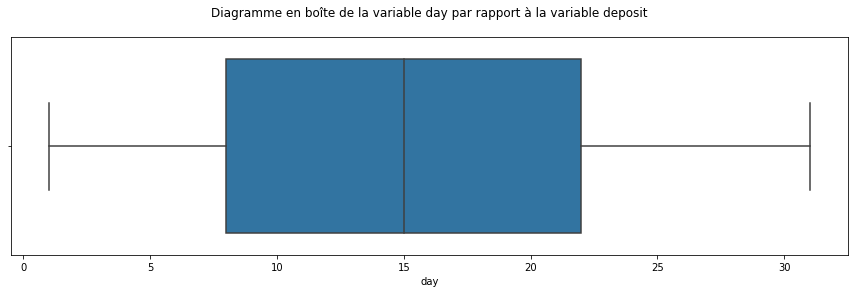

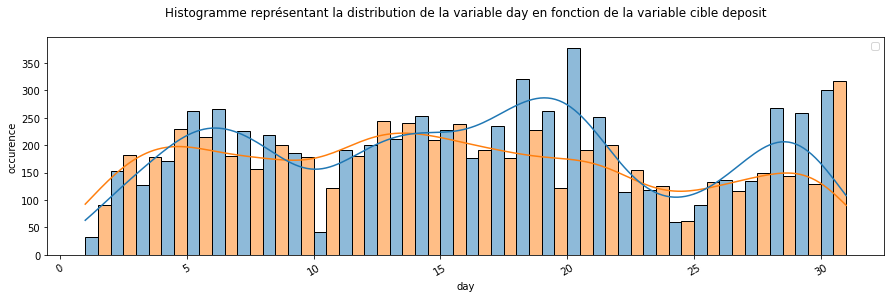

In [19]:
num_scan('day')

month
count  11162.000000
mean       6.190826
std        2.572792
min        1.000000
25%        5.000000
50%        6.000000
75%        8.000000
max       12.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


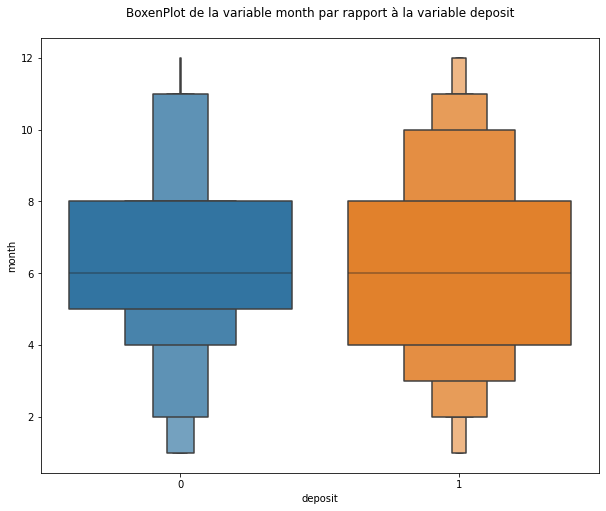

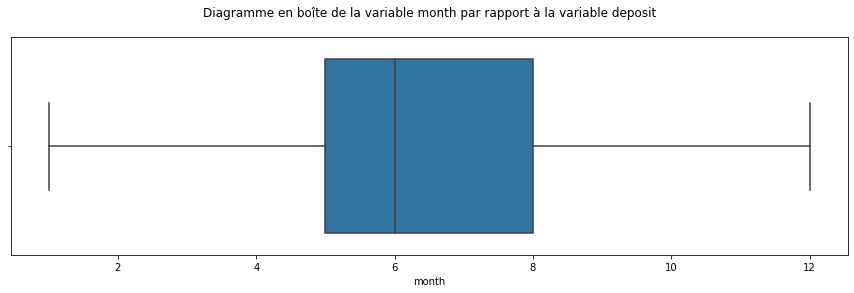

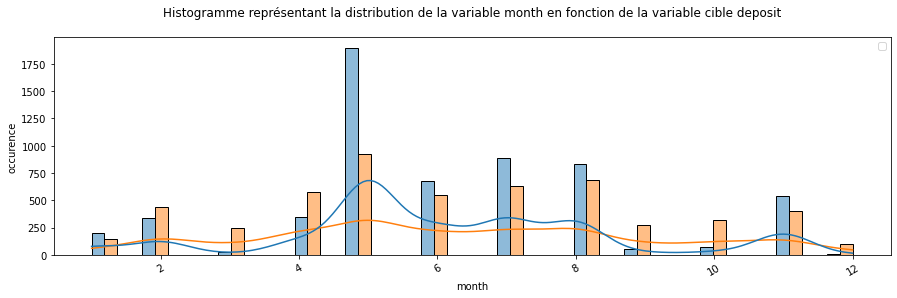

In [20]:
# On transforme manuellement la variable month en variable indicatrice avant d'appliquer la fonction

df.month = df.month.replace({'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 
                             'oct' : 10, 'nov' : 11, 'dec' : 12, 'jan' : 1, 
                             'feb' : 2, 'mar' : 3, 'apr' : 4, 'sep' : 9})

num_scan('month')

campaign
count  11162.000000
mean       2.508421
std        2.722077
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       63.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


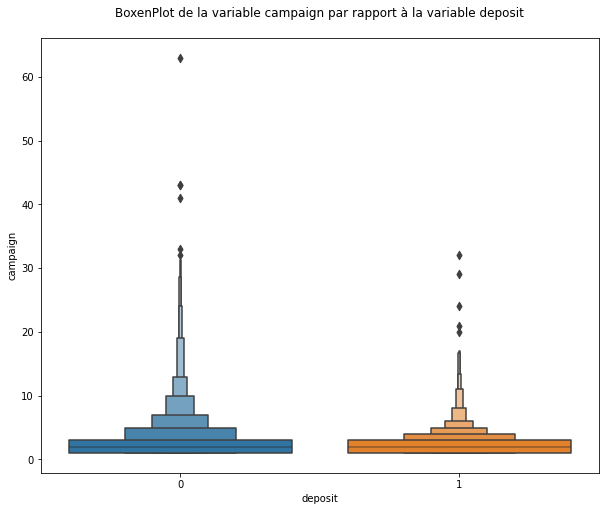

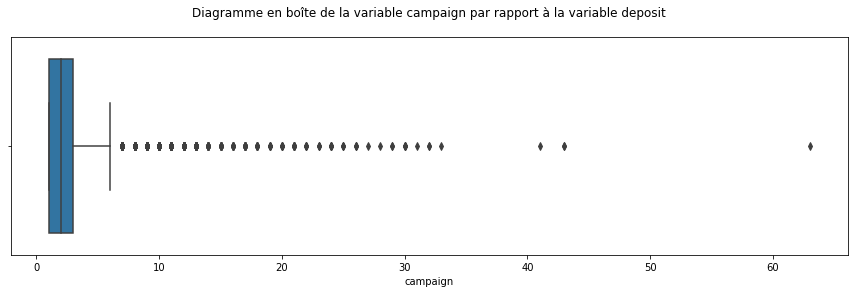

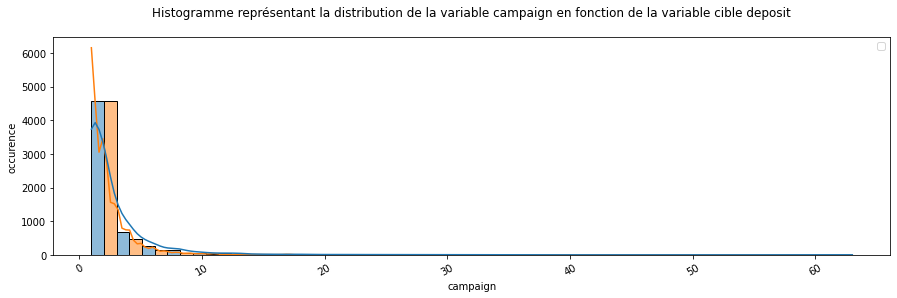

In [21]:
num_scan('campaign')

previous
count  11162.000000
mean       0.832557
std        2.292007
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       58.000000

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


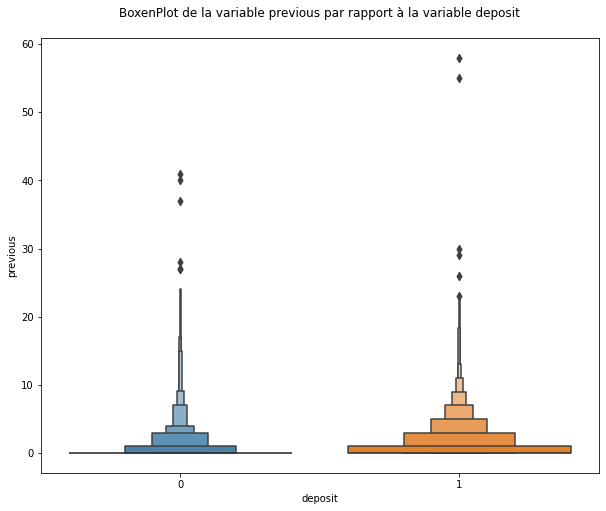

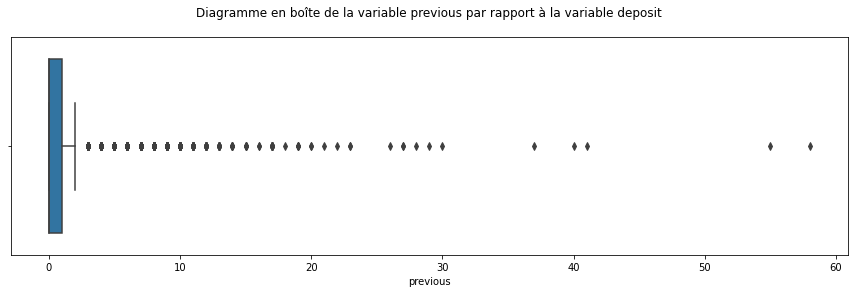

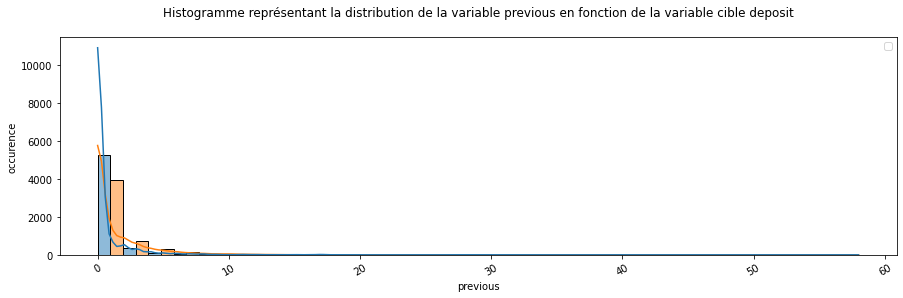

In [22]:
num_scan('previous')


**De prime abord, On constate la présence de valeurs aberrantes particulièrement pour 3 variables quantitatives, à savoir « balance », « duration », et « pdays ». On peut observer cela dans les colonnes « diff_médiane_moyenne » et « Ecart max-min » notamment, ainsi que dans l’écart entre les différents quantiles pour ces mêmes variables. Cependant, cela reste à nuancer : effectivement, il y a peu de points isolés dans les différents graphiques de visualisation. Les diagrammes en boîte ainsi que les histogrammes présentent souvent des alignements de points qui ressemblent plus à des distributions exponentielles qu’à de vrais outliers.**


## Corrélation entre les variables quantitatives


**Tout d'abord, l'étude de la corrélation entre les différentes variables quantitatives s'effectuera graphiquement, par le biais d'un pairplot et d'une matrice de corrélation. Par la suite, nous utiliserons le test statistique de Pearson pour confirmer nos résultats.**


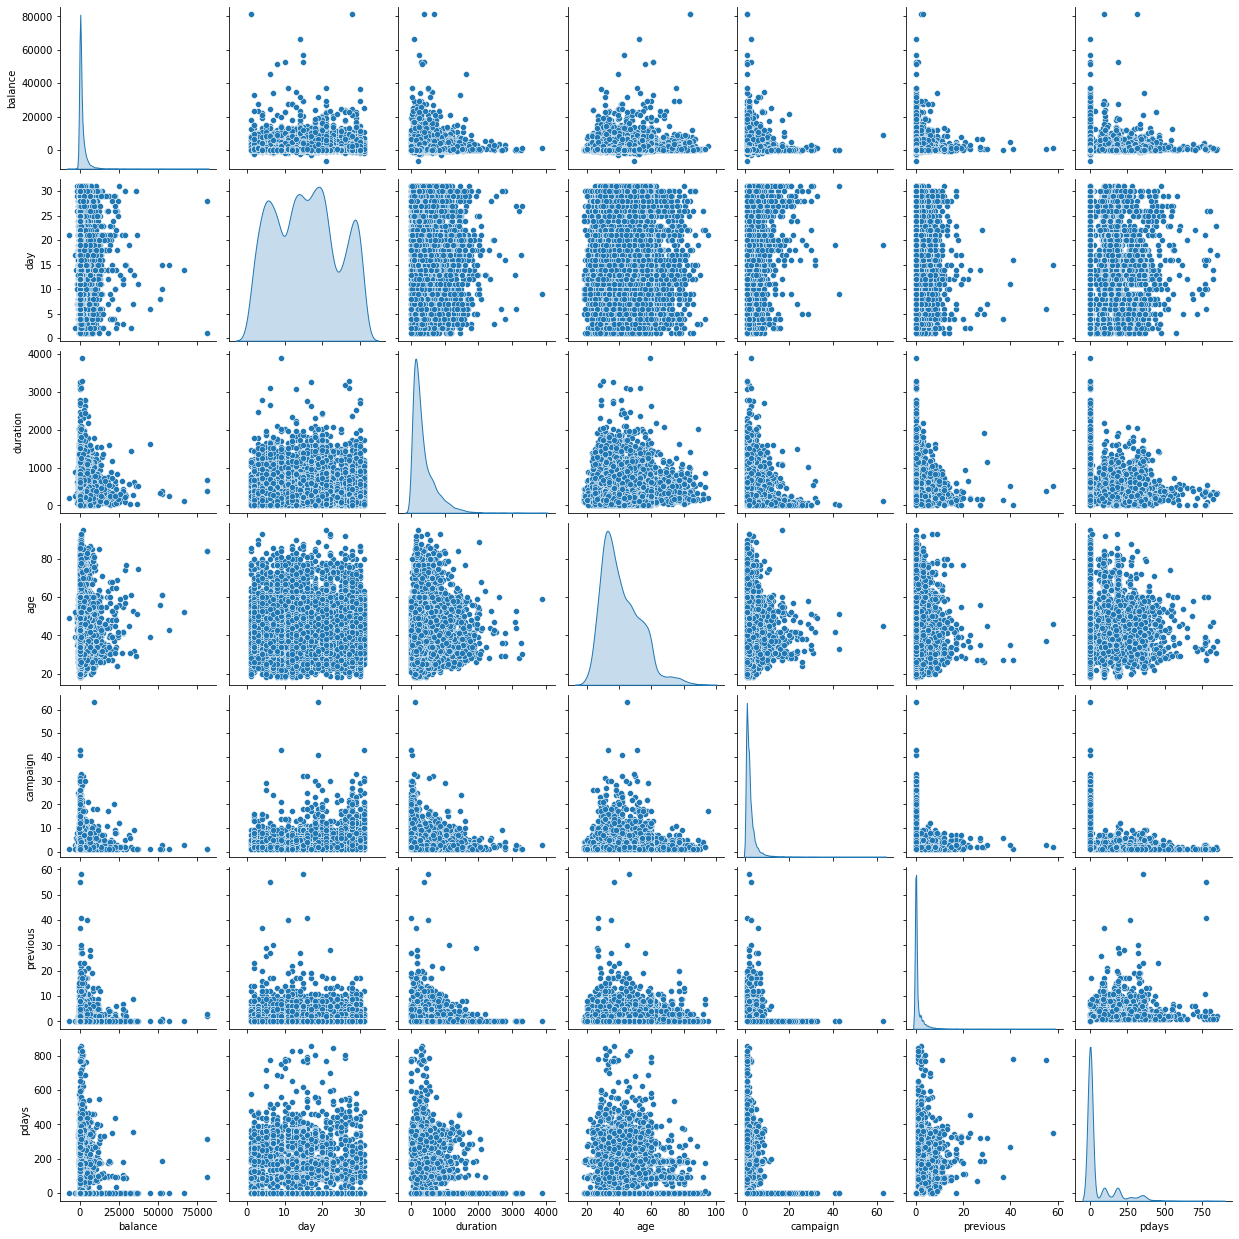

In [23]:
sns.pairplot(df[['balance', 'day', 'duration', 'age', 'campaign', 'previous', 'pdays']], 
             diag_kind = 'kde', data = df);
# Enregistrement du pairplot dans le répertoire courant
filename = 'Pairplot.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


**Comme on peut l'observer, les variables sont très peu corrélées entre elles, mais on constate la présence de valeurs extrêmes.**

age  balance   day  month  duration  campaign  pdays  previous  \
age       1.00     0.11 -0.00   0.07      0.00     -0.01   0.00      0.02   
balance   0.11     1.00  0.01   0.06      0.02     -0.01   0.02      0.03   
day      -0.00     0.01  1.00   0.06     -0.02      0.14  -0.08     -0.06   
month     0.07     0.06  0.06   1.00      0.01      0.04  -0.04     -0.00   
duration  0.00     0.02 -0.02   0.01      1.00     -0.04  -0.03     -0.03   
campaign -0.01    -0.01  0.14   0.04     -0.04      1.00  -0.10     -0.05   
pdays     0.00     0.02 -0.08  -0.04     -0.03     -0.10   1.00      0.51   
previous  0.02     0.03 -0.06  -0.00     -0.03     -0.05   0.51      1.00   
deposit   0.03     0.08 -0.06   0.03      0.45     -0.13   0.15      0.14   

          deposit  
age          0.03  
balance      0.08  
day         -0.06  
month        0.03  
duration     0.45  
campaign    -0.13  
pdays        0.15  
previous     0.14  
deposit      1.00

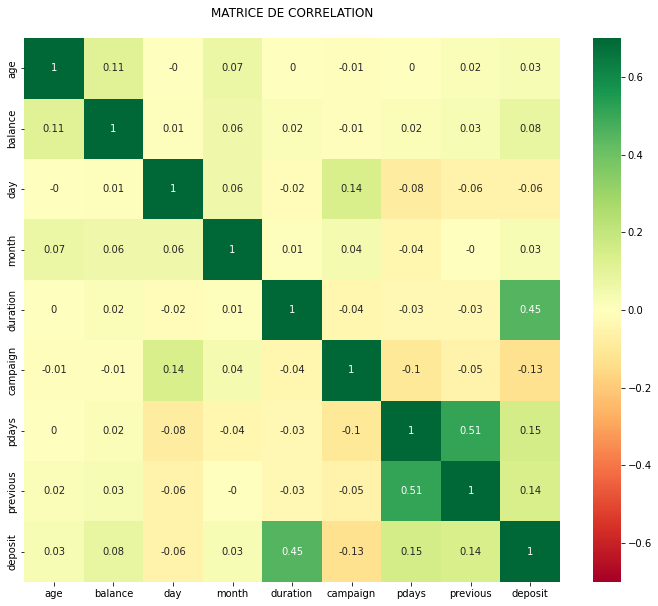

In [24]:
# Matrice de corrélation

cor = df.corr().round(2)
display(cor)
plt.figure(figsize=(12,10))
ax = sns.heatmap(cor, annot = True, cmap = "RdYlGn", vmin = -0.7, vmax = 0.7)
ax.set_title('MATRICE DE CORRELATION\n');
# Enregistrement de la matrice dans le répertoire courant
filename = 'Matrice_corr.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")



**D'après la matrice de confusion, il y a très peu de corrélation entre les variables quantitatives.** 

**Cependant, on peut constater que la corrélation est plus importante entre la variable 'duration' et la variable cible 'deposit'.** 

Par ailleurs, on constate également une corrélation assez forte entre la variable 'pdays' et la variable 'previous' : ceci est cohérent dans la mesure où pdays correspond au nombre de jours qui se sont écoulés depuis que le client a été contacté et 'previous' correspond au nombre de contacts telephoniques lors des campagnes précédentes. 

**Sur la base de ce constat, on va donc effectuer un test de Pearson entre la variable cible et 'duration' :**


In [25]:
# from scipy.stats import pearsonr

print('Test de corrélation de Pearson variables deposit-duration\n\n',pd.DataFrame(pearsonr(df['deposit'], df['duration']), 
                                                                                   index=['pearson_coeff','p-value'], 
                                                                                   columns=['resultat_test']).round(2), 
      
      '\n\n Le coefficient de Pearson n est pas négligeable, comme on a déjà pu l observer dans la matrice de corrélation.\n', 
      
      'La p-value étant strictement inférieure à 0.5, on rejette H0 : les deux variables testées ne sont pas indépendantes.\n',
      
      'De plus, la corrélation est assez significative selon le coefficient de Pearson.')

# On peut également effectuer le test avec une autre variable quantitative au hasard, la variable balance par exemple :

print('\n\nTest de corrélation de Pearson variables deposit-balance\n\n',pd.DataFrame(pearsonr(df.deposit, df.balance), 
                                                                                      index = ['pearson_coeff', 'p-value'], 
                                                                                      columns = ['resultat_test']).round(2), 
      
      '\n\nLa p-value étant strictement inférieure à 0.5, on rejette H0 : les deux variables testées ne sont pas indépendantes.\n',
      
      'Cependant, la corrélation est très peu significative selon le coefficient de Pearson.') 


Test de corrélation de Pearson variables deposit-duration

                resultat_test
pearson_coeff           0.45
p-value                 0.00 

 Le coefficient de Pearson n est pas négligeable, comme on a déjà pu l observer dans la matrice de corrélation.
 La p-value étant strictement inférieure à 0.5, on rejette H0 : les deux variables testées ne sont pas indépendantes.
 De plus, la corrélation est assez significative selon le coefficient de Pearson.


Test de corrélation de Pearson variables deposit-balance

                resultat_test
pearson_coeff           0.08
p-value                 0.00 

La p-value étant strictement inférieure à 0.5, on rejette H0 : les deux variables testées ne sont pas indépendantes.
 Cependant, la corrélation est très peu significative selon le coefficient de Pearson.



**Notre constat concernant la corrélation entre la variable 'duration' et deposit est vérifié**


# PREPROCESSING 1 (pour modélisation sans sélection de variables)

## TRANSFORMATION DES VARIABLES CATEGORIELLES EN VARIABLES INDICATRICES

In [26]:
# On encode les variables default, loan et housing ('deposit' a déjà été encodée)

from sklearn.preprocessing import LabelEncoder
L_E = LabelEncoder()
df['default'] = L_E.fit_transform(df['default'])
df.deposit = L_E.fit_transform(df.deposit)
df.loan = L_E.fit_transform(df.loan)
df.housing = L_E.fit_transform(df.housing)

df.head(2)


age     job  marital  education  default  balance  housing  loan  contact  \
0   59  admin.  married  secondary        0     2343        1     0  unknown   
1   56  admin.  married  secondary        0       45        0     0  unknown   

   day  month  duration  campaign  pdays  previous poutcome  deposit  
0    5      5      1042         1     -1         0  unknown        1  
1    5      5      1467         1     -1         0  unknown        1

In [4]:
# On effectue une dichotomisation des variables job, marital, education, contact et poutcome
# On est ensuite obligé de mettre le code en commentaire car code erreur pusique les 
# variables ont été supprimées. 

for i, j in zip((df.job, df.marital, df.education, df.contact, df.poutcome), 
                ('job', 'marital', 'education', 'contact', 'poutcome')):
    dicho_ = pd.get_dummies(i, prefix = j)
    df = df.join(dicho_)
    df = df.drop(j, axis = 1)

# Il ne reste que la variable month à convertir en variable indicatrice : 

df.month.unique()
df.month = df.month.replace({'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 
                             'oct' : 10, 'nov' : 11, 'dec' : 12, 'jan' : 1, 
                             'feb' : 2, 'mar' : 3, 'apr' : 4, 'sep' : 9})

# On vérifie à présent à nouveau qu'aucun Nan n'est présent dans le dataframe : 
df.isna().sum()


age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
deposit                0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64

In [28]:
# On affiche le dataset pour vérifier les résultats : 

df.head(3)


age  default  balance  housing  loan  day  month  duration  campaign  \
0   59        0     2343        1     0    5      5      1042         1   
1   56        0       45        0     0    5      5      1467         1   
2   41        0     1270        1     0    5      5      1389         1   

   pdays  ...  education_secondary  education_tertiary  education_unknown  \
0     -1  ...                    1                   0                  0   
1     -1  ...                    1                   0                  0   
2     -1  ...                    1                   0                  0   

   contact_cellular  contact_telephone  contact_unknown  poutcome_failure  \
0                 0                  0                1                 0   
1                 0                  0                1                 0   
2                 0                  0                1                 0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  

[3 rows x 38 columns]

## SUPPRESSION DES VALEURS ABERRANTES

In [29]:
# On élimine ensuite les valeurs aberrantes :
# Même si quelque peu inutile

df = df.drop(df.loc[df.pdays > 750].index)
df = df.drop(df.loc[df.balance > 60000].index)
df = df.drop(df.loc[df.campaign > 35].index)
df = df.drop(df.loc[df.previous > 35].index)


## NORMALISATION DES DONNEES

In [5]:
# On normalise les données
from sklearn import preprocessing

# On ne normalise pas la variable cible, donc on la supprime
# On la conserve d'abord dans une variable appelée deposit
deposit = df.deposit
df = df.drop('deposit', axis = 1)

scaler = preprocessing.StandardScaler().fit(df)
df = scaler.transform(df)

# Enregistrement du tableau standardisé
import pickle
filename = 'scaler.joblib'
pickle.dump(scaler, open(filename, 'wb'))

# Transformation de df en DataFrame à nouveau
df = pd.DataFrame(df, columns = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'month',
                                      'duration', 'campaign', 'pdays', 'previous', 'job_admin.',
                                      'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
                                      'job_management', 'job_retired', 'job_self-employed', 'job_services',
                                      'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
                                      'marital_divorced', 'marital_married', 'marital_single',
                                      'education_primary', 'education_secondary', 'education_tertiary',
                                      'education_unknown', 'contact_cellular', 'contact_telephone',
                                      'contact_unknown', 'poutcome_failure', 'poutcome_other',
                                      'poutcome_success', 'poutcome_unknown'])

# Affichage de df
df.head()


TypeError: 'Index' object is not callable

## SEPARATION DES DONNEES EN JEU D'ENTRAINEMENT ET DE TEST

In [31]:
# On commence par éliminer la variable duration qui est très corrélée avec la variable cible :
df = df.drop('duration', axis = 1)

# On sépare les données en data et en target
# Ici, on ne fait que de les renommer
target = deposit
# On a déjà supprimé deposit, on change juste de nom
data = df

# On sépare les données en jeu d'entraînement et de test 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2)

X_train

age   default   balance   housing      loan       day     month  \
5733   1.492832  8.079958 -0.620085 -0.946985  2.578440 -0.196834  0.316312   
5747   0.148908 -0.123763 -0.505761 -0.946985 -0.387831 -0.790440 -0.461443   
778   -0.859036 -0.123763 -0.453461 -0.946985 -0.387831 -0.315555  0.705190   
4569  -0.019083 -0.123763  2.340925  1.055983 -0.387831  0.278050  1.871823   
6522  -0.607050 -0.123763 -0.336455  1.055983 -0.387831 -0.315555 -0.461443   
...         ...       ...       ...       ...       ...       ...       ...   
3972   1.660822 -0.123763  0.359208 -0.946985 -0.387831  0.040608  1.094067   
7160  -0.607050 -0.123763 -0.483299  1.055983 -0.387831 -1.146603 -0.461443   
10726  1.492832 -0.123763 -0.071265 -0.946985 -0.387831 -0.552998  0.705190   
4805   1.828813 -0.123763  0.034677 -0.946985 -0.387831  0.159329 -1.628076   
4542  -0.439059 -0.123763 -0.108814  1.055983 -0.387831 -1.146603 -0.850321   

       campaign     pdays  previous  ...  education_secondary  \
5733   0.196159 -0.487403 -0.390896  ...             1.019222   
5747   0.196159 -0.487403 -0.390896  ...            -0.981140   
778    1.745399 -0.487403 -0.390896  ...            -0.981140   
4569  -0.578461 -0.487403 -0.390896  ...             1.019222   
6522  -0.578461 -0.487403 -0.390896  ...            -0.981140   
...         ...       ...       ...  ...                  ...   
3972   0.196159  1.444787  2.986903  ...            -0.981140   
7160  -0.578461 -0.487403 -0.390896  ...             1.019222   
10726  3.294639 -0.487403 -0.390896  ...            -0.981140   
4805  -0.191151 -0.487403 -0.390896  ...             1.019222   
4542  -0.578461 -0.487403 -0.390896  ...             1.019222   

       education_tertiary  education_unknown  contact_cellular  \
5733            -0.702825          -0.215681          0.622487   
5747            -0.702825          -0.215681         -1.606458   
778              1.422829          -0.215681          0.622487   
4569            -0.702825          -0.215681          0.622487   
6522            -0.702825          -0.215681         -1.606458   
...                   ...                ...               ...   
3972            -0.702825          -0.215681          0.622487   
7160            -0.702825          -0.215681         -1.606458   
10726            1.422829          -0.215681          0.622487   
4805            -0.702825          -0.215681         -1.606458   
4542            -0.702825          -0.215681          0.622487   

       contact_telephone  contact_unknown  poutcome_failure  poutcome_other  \
5733           -0.272546        -0.515781         -0.350277       -0.223322   
5747           -0.272546         1.938807         -0.350277       -0.223322   
778            -0.272546        -0.515781         -0.350277       -0.223322   
4569           -0.272546        -0.515781         -0.350277       -0.223322   
6522           -0.272546         1.938807         -0.350277       -0.223322   
...                  ...              ...               ...             ...   
3972           -0.272546        -0.515781         -0.350277        4.477839   
7160           -0.272546         1.938807         -0.350277       -0.223322   
10726          -0.272546        -0.515781         -0.350277       -0.223322   
4805            3.669106        -0.515781         -0.350277       -0.223322   
4542           -0.272546        -0.515781         -0.350277       -0.223322   

       poutcome_success  poutcome_unknown  
5733          -0.325866          0.581636  
5747          -0.325866          0.581636  
778           -0.325866          0.581636  
4569          -0.325866          0.581636  
6522          -0.325866          0.581636  
...                 ...               ...  
3972          -0.325866         -1.719288  
7160          -0.325866          0.581636  
10726         -0.325866          0.581636  
4805          -0.325866          0.581636  
4542          -0.325866          0.581636  

[8908 rows 


## VERIFICATION DE LA DISTRIBUTION DE LA VARIABLE CIBLE DEPOSIT (OVERFITTING)


In [32]:
# On vérifie que la variable deposit est bien équilibrée
# afin d'éviter le sur-entraînement des modèles de machine-learning
print('distribution de la variable cible target\n', target.value_counts(normalize=True))

# D'après les résultats, la variable deposit est à peu 
# près équilibrée, on applique tout de même un over-sampling
# avec RandomOverSampler et SMOTE
from imblearn.over_sampling import RandomOverSampler, SMOTE

# RANDOM OVER SAMPLER
ROS = RandomOverSampler()
# Tuple assignment
X_train, Y_train = ROS.fit_resample(X_train, Y_train)
print('\nClasses échantillon oversampled :\n', dict(pd.Series(Y_train).value_counts(normalize = True)))

# SMOTE
SMO = SMOTE()
# Tuple assignment
X_train, Y_train = SMO.fit_resample(X_train, Y_train)
print('\nClasses échantillon SMOTE :\n', dict(pd.Series(Y_train).value_counts(normalize = True)))

# Les échantillons sont maintenant totalement équilibrés. 


distribution de la variable cible target
 0    0.526311
1    0.473689
Name: deposit, dtype: float64

Classes échantillon oversampled :
 {0: 0.5, 1: 0.5}

Classes échantillon SMOTE :
 {0: 0.5, 1: 0.5}



# MODELES DE CLASSIFICATION



##  MODELISATION STATISTIQUE (SANS AVOIR SELECTIONNE LES VARIABLES)

### MODELES INDIVIDUELS selon RandomizedSearchCV (sans sélection de variables)

In [33]:
# AVEC RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
import pickle

clf_logistic = LogisticRegression()
clf_rdf = RandomForestClassifier()
clf_grad = GradientBoostingClassifier()

params_logistic = {'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

params_rdf = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
              'max_features': [.5, .7], 
              'bootstrap' : [False, True], 
              'max_depth' : [3, 6]}

params_grad = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
               'max_depth' : [2,3,5,6], 
               'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

clf = [clf_logistic, clf_rdf, clf_grad]
params = [params_logistic, params_rdf, params_grad]

for i, j in zip(clf, params):
    from sklearn.model_selection import RandomizedSearchCV
    grid = RandomizedSearchCV(estimator = i, param_distributions = j, cv = 10) 
    grid = grid.fit(X_train, Y_train)
    y_pred = grid.predict(X_test)
    score = grid.score(X_test, Y_test)
    print('\n\nRESULTATS POUR LE MODELE', i, 'sans sélection de variables :\n\n', classification_report(Y_test, y_pred), 
          '\nMeilleurs paramètres retenus :', grid.best_params_)




RESULTATS POUR LE MODELE LogisticRegression() sans sélection de variables :

               precision    recall  f1-score   support

           0       0.71      0.69      0.70      1182
           1       0.66      0.67      0.67      1046

    accuracy                           0.68      2228
   macro avg       0.68      0.68      0.68      2228
weighted avg       0.68      0.68      0.68      2228
 
Meilleurs paramètres retenus : {'C': 0.2}


RESULTATS POUR LE MODELE RandomForestClassifier() sans sélection de variables :

               precision    recall  f1-score   support

           0       0.72      0.77      0.74      1182
           1       0.71      0.66      0.68      1046

    accuracy                           0.71      2228
   macro avg       0.71      0.71      0.71      2228
weighted avg       0.71      0.71      0.71      2228
 
Meilleurs paramètres retenus : {'n_estimators': 300, 'max_features': 0.5, 'max_depth': 6, 'bootstrap': True}


RESULTATS POUR LE MODELE Gr

### MODELES GROUPES (sans sélection de variables)

#### StackingClassifier avec et sans RandomizedSearchCV

In [34]:

###################################### SANS VALIDATION CROISEE NI RandomizedSearchCV ###################################

# Import des librairies
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report

# Instanciation de tous les classifieurs
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.3)
clf_random_f = RandomForestClassifier(n_estimators = 100, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_grad_boos = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1)
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], final_estimator = clf_grad_boos)

# Entraînement du modèle StackingClassifier
sclf.fit(X_train, Y_train)
y_pred = sclf.predict(X_test)

# Affichage des résultats
print('\n\nRESULTATS POUR LE MODELE StackingClassifier sans RandomizedSearchCV (sans sélection de variables) : \n\n', 
      classification_report(Y_test, y_pred), '\n\n')

################################################### AVEC RANDOMIZED ####################################################

# Import des librairies
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Instanciation de tous les classifieurs
clf_log = LogisticRegression()
clf_random_f = RandomForestClassifier()
clf_grad_boos = GradientBoostingClassifier()
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), 
                                        ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], 
                          final_estimator = clf_grad_boos)

params = {'LOGISTIC__C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
          'RANDOM_FOREST__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          'RANDOM_FOREST__max_features' : [.5, .7],
          'RANDOM_FOREST__bootstrap' : [False, True],
          'RANDOM_FOREST__max_depth' : [3, 6],
          'GRADIENT_BOOSTING__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          'GRADIENT_BOOSTING__max_depth' : [2,3,5,6],
          'GRADIENT_BOOSTING__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

grid = RandomizedSearchCV(estimator = sclf, param_distributions = params, cv = 10) 
grid = grid.fit(X_train, Y_train)
y_pred = grid.predict(X_test)
print('RESULTATS POUR LE MODELE StackingClassifier avec RandomizedSearchCV (sans sélection de variables) : \n\n', 
      classification_report(Y_test, y_pred), 
      '\nMeilleurs paramètres retenus : \n\n', grid.best_params_, '\n\n')




RESULTATS POUR LE MODELE StackingClassifier sans RandomizedSearchCV (sans sélection de variables) : 

               precision    recall  f1-score   support

           0       0.72      0.77      0.75      1182
           1       0.72      0.66      0.69      1046

    accuracy                           0.72      2228
   macro avg       0.72      0.72      0.72      2228
weighted avg       0.72      0.72      0.72      2228
 


RESULTATS POUR LE MODELE StackingClassifier avec RandomizedSearchCV (sans sélection de variables) : 

               precision    recall  f1-score   support

           0       0.71      0.83      0.77      1182
           1       0.76      0.62      0.68      1046

    accuracy                           0.73      2228
   macro avg       0.74      0.72      0.73      2228
weighted avg       0.74      0.73      0.73      2228
 
Meilleurs paramètres retenus : 

 {'RANDOM_FOREST__n_estimators': 500, 'RANDOM_FOREST__max_features': 0.7, 'RANDOM_FOREST__max_depth':

## MODELISATION STATISTIQUE (APRES AVOIR SELECTIONNE LES VARIABLES)


### REDUCTION DE DIMENSION par la méthode PCA (NON NECESSAIRE ICI)

In [35]:
# A présent, on va tenter d'utiliser la cpa afin de sélectionner les variables
# On n'a pas éliminé encore les outliers pour l'instant

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95)
pca.fit(X_train, X_test)
print("\nNombre de composantes retenues avec PCA en conservant une variance expliquée à 95%:", pca.n_components_)

# 25 variables du modèle ont été retenues, ce qui n'est pas étonnant au vu de leur
# faible corrélation (l'intérêt de la pca est d'éliminer les corrélations
# entre les variables par le biais de la combinaison linéaire).
# Dans le cas présent, il n'y a aucun intérêt à effectuer une pca. 

# Les parts de variance expliquée se cumulent et on peut 
# clairement voir à quelle variance expliquée on en est 
# au fur et à mesure que le nombre de composantes principales
# évolue. Il faut conserver une variance expliquée assez élevée
# pour ne pas perdre l'information en supprimant les variables
pca.explained_variance_ratio_.cumsum()



Nombre de composantes retenues avec PCA en conservant une variance expliquée à 95%: 27


array([0.09971862, 0.17344358, 0.24281063, 0.2920813 , 0.33817511,
       0.3789221 , 0.4169258 , 0.45078034, 0.48412374, 0.51640207,
       0.54757273, 0.57836096, 0.60905723, 0.63910066, 0.66844706,
       0.6971127 , 0.72524659, 0.7532042 , 0.77951989, 0.80533391,
       0.83018157, 0.85419133, 0.87723464, 0.89972051, 0.9215707 ,
       0.94158409, 0.96027777])

### SELECTION DE VARIABLES AVEC LES WRAPPER METHODS

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)



Nombre de features retenus : 14


Les variables qui ont été sélectionnées par wrapper method sont :

 ['balance', 'housing', 'loan', 'day', 'campaign', 'job_retired', 'job_student', 'marital_married', 'education_tertiary', 'contact_cellular', 'contact_unknown', 'poutcome_failure', 'poutcome_success', 'poutcome_unknown']


Le nombre de variables supprimées par le modèle est de :  22


Les variables qui ont été supprimées par wrapper method sont :

 ['age', 'default', 'month', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_self-employed', 'job_services', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_single', 'education_primary', 'education_secondary', 'education_unknown', 'contact_telephone', 'poutcome_other'] 



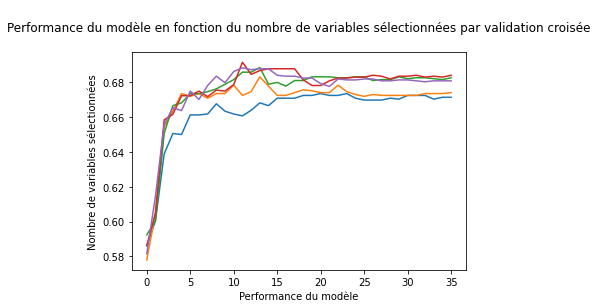

In [36]:
# J'ai choisi de ne pas faire les embedded methods car elles utilisent le modèle svm 
# dans le cas de la classification et ce n'est pas optimal en terme de temps

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFECV

clf_logistic = LogisticRegression()
clf_arbre = DecisionTreeClassifier()

crossval = KFold(n_splits = 5, random_state = 2, shuffle = True)
rfecv = RFECV(estimator = clf_logistic, cv = crossval)
rfecv.fit(X_train, Y_train)
# Obtenir les variables sélectionnées par ordre (bolléens)
mask = rfecv.get_support()

# On trace la courbe de scores en fonction du nombre de variables sélectionnées
plt.plot(rfecv.grid_scores_);
plt.title('\nPerformance du modèle en fonction du nombre de variables sélectionnées par validation croisée\n')
plt.xlabel('Performance du modèle')
plt.ylabel('Nombre de variables sélectionnées')
print("\nNombre de features retenus :", rfecv.n_features_)
# Enregistrement de la courbe des scores dans le répertoire courant
filename = 'Courbe_Score_RFE_LOGISTIC.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

liste_var_select = []
for i, j in zip(mask, data) : 
    if i == True : 
        liste_var_select.append(j)
print('\n\nLes variables qui ont été sélectionnées par wrapper method sont :\n\n',liste_var_select)

Colonnes_data = ['age', 'default', 'balance', 'housing', 'loan', 'day', 'month', 
                'campaign', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 
                'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 
                'job_self-employed', 'job_services', 'job_student', 'job_technician', 
                'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 
                'marital_single', 'education_primary', 'education_secondary', 'education_tertiary',
                'education_unknown', 'contact_cellular', 'contact_telephone', 'contact_unknown', 
                'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

liste_var_del = []
for j in Colonnes_data : 
        if j not in liste_var_select : 
            liste_var_del.append(j)

i = 0
for x in liste_var_del : 
    i = i + 1
print('\n\nLe nombre de variables supprimées par le modèle est de : ', i)
print('\n\nLes variables qui ont été supprimées par wrapper method sont :\n\n', liste_var_del, '\n')


### Variables à ajouter à la liste des variables supprimées par wrapper methods

In [37]:
# Par ailleurs, j'ai remarqué grâce aux graphiques de la fonction cat_scan que certaines variables
# catégorielles contiennent vraiment beaucoup de no par rapport aux yes (0 par rapport aux 1), 
# et je souhaiterais les supprimer également pour voir si cela change quelque chose aux résultats 
# et de quelle manière ça les impacte. 
# Je vais rajouter ces variables à supprimer quelles que soient les variables supprimées par les wrapper
# methods. 

# Il s'agit des variables : 
# job_admin., job_blue-collar, job_self-employed, education_secondary, education_primary,
# contact_unknown, marital_married, month (pour may) et poutcome_unknown. 

# On créé une liste avec les variables que l'on souhaite supprimer en plus : 
var_a_supp = ['job_admin.', 'job_blue-collar', 'job_self-employed', 'job_unknown',
              'job_unknown', 'education_secondary', 'education_primary', 
              'education_unknown', 'contact_unknown', 'marital_divorced', 'month', 
              'poutcome_unknown', 'pdays', 'age']

# On les ajoute à la liste à supprimer : 
for y in var_a_supp : 
    if y not in liste_var_del : 
        liste_var_del.append(y)

# On va tester pour voir si le code marche : 
z = 0
for x in liste_var_del : 
    z = z + 1
    
print('\n\nLe nombre total de variables supprimées par le modèle est de : ', z)
print('\n\nLe nombre de variables catégorielles qui ont été supprimées en plus est de :', z - i)
print('\n\nLes variables totales qui ont été supprimées sont :\n\n', liste_var_del)
print('\n\nLes variables catégorielles qui ont été supprimées en plus sont :', liste_var_del[-z + i:],'\n')




Le nombre total de variables supprimées par le modèle est de :  24


Le nombre de variables catégorielles qui ont été supprimées en plus est de : 2


Les variables totales qui ont été supprimées sont :

 ['age', 'default', 'month', 'pdays', 'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_self-employed', 'job_services', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_single', 'education_primary', 'education_secondary', 'education_unknown', 'contact_telephone', 'poutcome_other', 'contact_unknown', 'poutcome_unknown']


Les variables catégorielles qui ont été supprimées en plus sont : ['contact_unknown', 'poutcome_unknown'] 



### SELECTION DE VARIABLES AVEC LES METHODES TRADITIONNELLES

#### Variables les plus importantes selon LogisticRegression

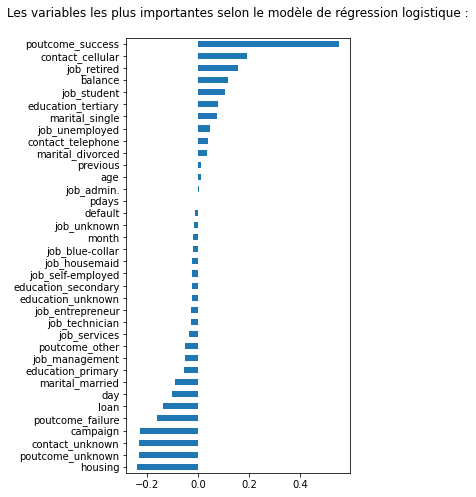

In [38]:
# print('\nVariables les plus importantes selon le modèle de régression logistique :\n')
clf_logistic = LogisticRegression(C = 0.3)
clf_logistic.fit (X_train, Y_train)
pd.Series(clf_logistic.coef_[0], pd.DataFrame(X_train, columns = ['age', 'default', 
                                                                  'balance', 'housing', 
                                                                  'loan', 'day', 'month',
       'campaign', 'pdays', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown']).columns).sort_values(ascending = True).plot(kind = 'barh', figsize=(4,8));

plt.title('Les variables les plus importantes selon le modèle de régression logistique :\n')

# Enregistrement de la figure dans le répertoire courant
filename = 'VAR_SELECT_LOG_METHODE_CLASSIQUES.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

# On constate que c'est cohérent avec les variables qui ont été supprimées juste au-dessus par les wrapper methods


#### Variables les plus importantes selon RandomForestClassifier

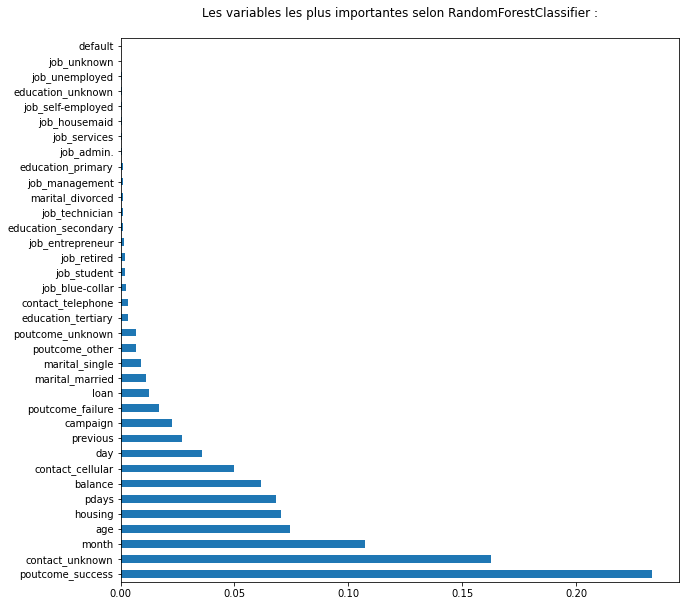

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf_random_f = RandomForestClassifier(n_estimators = 100, max_features = 0.5, max_depth = 6, bootstrap = True)

clf_random_f.fit (X_train, Y_train)
plt.figure(figsize = (10,10))
plt.title('Les variables les plus importantes selon RandomForestClassifier :\n')
feat_importances = pd.Series(clf_random_f.feature_importances_, 
                             index = X_train.columns).nlargest(36).sort_values(ascending = False).plot(kind='barh');

# Enregistrement de la figure dans le répertoire courant
filename = 'VAR_SELECT_RDF_METHODE_CLASSIQUES.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


#### Variables les plus importantes selon GradientBoostingClassifier

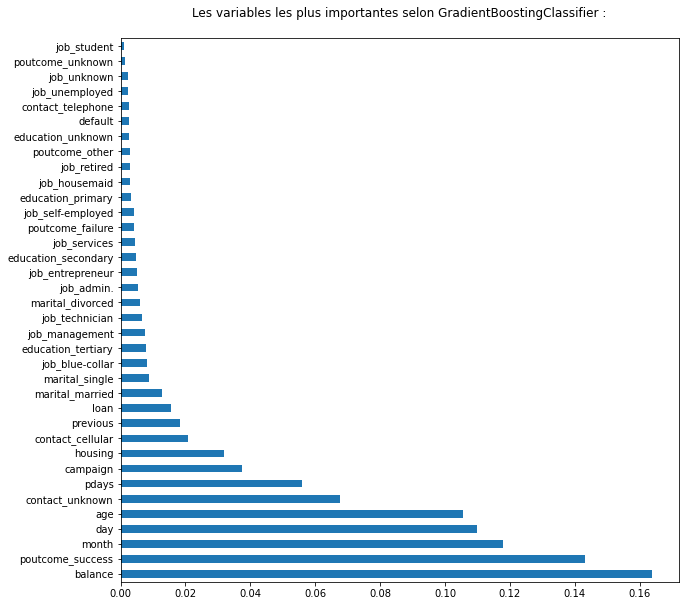

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
clf_grad_boos = GradientBoostingClassifier(n_estimators = 200, max_depth = 6, learning_rate = 0.1)

clf_grad_boos.fit (X_train, Y_train)
plt.figure(figsize = (10,10))
plt.title('Les variables les plus importantes selon GradientBoostingClassifier :\n')
feat_importances = pd.Series(clf_grad_boos.feature_importances_,
                             index = X_train.columns).nlargest(36).sort_values(ascending = False).plot(kind='barh');

# Enregistrement de la figure dans le répertoire courant
filename = 'VAR_SELECT_GRADBOOST_METHODE_CLASSIQUES.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


### SELECTION DE VARIABLES - DECISION ARBITRAIRE

In [41]:
liste_var_supp = ['contact_unknown', 'poutcome_unknown', 'job_unknown', 'education_unknown', 'poutcome_other']

## PREPROCESSING 2 (pour modélisation après suppression des variables)

In [42]:
# Pas besoin de normaliser les données, elles l'ont déjà été
# duration et deposit ont déjà été éliminées dans la partie preprocessing

# On va supprimer les colonnes présentes dans liste_var_supp
# Je mets en commentaire pour éviter les codes erreur car une fois supprimées
# les colonnes n'existent plus
df = df.drop(liste_var_supp, axis = 1)

# On vérifie que df contient le bon nombre de colonnes après suppression des variables ci-dessus
print('\n\nNombre de colonnes de df : ',df.columns.shape)

# On sépare les données en data et en target
data = df
target = deposit
print('\n\nNombre de colonnes de data : ', data.columns.shape)

# On sépare les données en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2)

# On vérifie que la variable deposit est bien équilibrée
# afin d'éviter le sur-entraînement des modèles de machine-learning
print('\n\nDistribution de la variable cible target\n', target.value_counts(normalize=True))
# D'après les résultats, la variable deposit est à peu 
# près équilibrée, on applique tout de même un over-sampling
# avec RandomOverSampler et SMOTE
from imblearn.over_sampling import RandomOverSampler, SMOTE
# RANDOM OVER SAMPLER
ROS = RandomOverSampler()
# Tuple assignment
X_train, Y_train = ROS.fit_resample(X_train, Y_train)
print('\nClasses échantillon oversampled :\n', dict(pd.Series(Y_train).value_counts(normalize = True)), '\n\n')
# Les échantillons sont maintenant totalement équilibrés. 




Nombre de colonnes de df :  (31,)


Nombre de colonnes de data :  (31,)


Distribution de la variable cible target
 0    0.526311
1    0.473689
Name: deposit, dtype: float64

Classes échantillon oversampled :
 {0: 0.5, 1: 0.5} 




### MODELES INDIVIDUELS selon RandomizedSearchCV (avec sélection de variables)

In [43]:
# AVEC RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

clf_logistic = LogisticRegression()
clf_rdf = RandomForestClassifier()
clf_grad = GradientBoostingClassifier()

params_logistic = {'C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

params_rdf = {'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
              'max_features': [.5, .7], 
              'bootstrap' : [False, True], 
              'max_depth' : [3, 6]}

params_grad = {'n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 
               'max_depth' : [2,3,5,6], 
               'learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

clf = [clf_logistic, clf_rdf, clf_grad]
params = [params_logistic, params_rdf, params_grad]

for i, j in zip(clf, params):
    from sklearn.model_selection import RandomizedSearchCV
    grid = RandomizedSearchCV(estimator = i, param_distributions = j, cv = 10) 
    grid = grid.fit(X_train, Y_train)
    y_pred = grid.predict(X_test)
    score = grid.score(X_test, Y_test)
    print('RESULTATS POUR LE MODELE', i, 'avec sélection de variables :\n\n', classification_report(Y_test, y_pred), 
          '\nMeilleurs paramètres retenus :', grid.best_params_, '\n\n')
    
    # Enregistrement du modèle
    filename = str(i)+'.joblib'
    pickle.dump(grid, open(filename, 'wb'))


RESULTATS POUR LE MODELE LogisticRegression() avec sélection de variables :

               precision    recall  f1-score   support

           0       0.71      0.68      0.69      1191
           1       0.65      0.67      0.66      1037

    accuracy                           0.68      2228
   macro avg       0.68      0.68      0.68      2228
weighted avg       0.68      0.68      0.68      2228
 
Meilleurs paramètres retenus : {'C': 0.1} 


RESULTATS POUR LE MODELE RandomForestClassifier() avec sélection de variables :

               precision    recall  f1-score   support

           0       0.70      0.81      0.75      1191
           1       0.73      0.60      0.66      1037

    accuracy                           0.71      2228
   macro avg       0.72      0.71      0.71      2228
weighted avg       0.72      0.71      0.71      2228
 
Meilleurs paramètres retenus : {'n_estimators': 400, 'max_features': 0.5, 'max_depth': 6, 'bootstrap': False} 


RESULTATS POUR LE MODELE G

### MODELES GROUPES (avec sélection de variables)

#### StackingClassifier avec  et sans RandomizedSearchCV

In [44]:
# On vérifie d'abord que df contient le nombre de colonnes qui a été sélectionné par les
# wrapper methods plus haut (le preprocessing pour la sélection de variables est effectué
# dans la partie juste au-dessus 'MODELES BASIQUES selon RandomizedSearchCV (avec sélection de variables)'
print('\n\nNombre de colonnes de df : ',df.columns.shape, '\n\n')

###################################### SANS VALIDATION CROISEE NI RandomizedSearchCV ###################################

# Import des librairies
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.metrics import classification_report

# Instanciation de tous les classifieurs
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.1)
clf_random_f = RandomForestClassifier(n_estimators = 800, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_grad_boos = GradientBoostingClassifier(n_estimators = 900, max_depth = 6, learning_rate = 0.1)
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], final_estimator = clf_grad_boos)

# Entraînement du modèle StackingClassifier
sclf.fit(X_train, Y_train)
y_pred = sclf.predict(X_test)

# Affichage des résultats
print('RESULTATS POUR LE MODELE StackingClassifier sans RandomizedSearchCV (avec sélection de variables) : \n\n', 
      classification_report(Y_test, y_pred), '\n\n')

################################################### AVEC RANDOMIZED ####################################################

# Import des librairies
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report

# Instanciation de tous les classifieurs
clf_log = LogisticRegression()
clf_random_f = RandomForestClassifier()
clf_grad_boos = GradientBoostingClassifier()
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), 
                                        ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], 
                          final_estimator = clf_grad_boos)

params = {'LOGISTIC__C' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
          'RANDOM_FOREST__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          'RANDOM_FOREST__max_features' : [.5, .7],
          'RANDOM_FOREST__bootstrap' : [False, True],
          'RANDOM_FOREST__max_depth' : [3, 6],
          'GRADIENT_BOOSTING__n_estimators' : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          'GRADIENT_BOOSTING__max_depth' : [2,3,5,6],
          'GRADIENT_BOOSTING__learning_rate' : [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

grid = RandomizedSearchCV(estimator = sclf, param_distributions = params, cv = 10) 
grid = grid.fit(X_train, Y_train)
y_pred = grid.predict(X_test)
print('RESULTATS POUR LE MODELE StackingClassifier avec RandomizedSearchCV (avec sélection de variables) : \n\n', 
      classification_report(Y_test, y_pred), 
      '\nMeilleurs paramètres retenus : \n\n', grid.best_params_, '\n\n')

# Enregistrement du modèle
filename = 'sclf.joblib'
pickle.dump(grid, open(filename, 'wb'))




Nombre de colonnes de df :  (31,) 


RESULTATS POUR LE MODELE StackingClassifier sans RandomizedSearchCV (avec sélection de variables) : 

               precision    recall  f1-score   support

           0       0.70      0.76      0.73      1191
           1       0.69      0.62      0.65      1037

    accuracy                           0.69      2228
   macro avg       0.69      0.69      0.69      2228
weighted avg       0.69      0.69      0.69      2228
 


RESULTATS POUR LE MODELE StackingClassifier avec RandomizedSearchCV (avec sélection de variables) : 

               precision    recall  f1-score   support

           0       0.71      0.82      0.76      1191
           1       0.75      0.61      0.67      1037

    accuracy                           0.72      2228
   macro avg       0.73      0.72      0.72      2228
weighted avg       0.73      0.72      0.72      2228
 
Meilleurs paramètres retenus : 

 {'RANDOM_FOREST__n_estimators': 200, 'RANDOM_FOREST__max_featur

# INTERPRETABILITE

 ## Installation de skater

In [45]:
pip install skater

Note: you may need to restart the kernel to use updated packages.


## PREPROCESSING 3 (pour interprétabilité : enlever la normalisation des données)

In [46]:
# On reprend le fichier d'origine
df2 = pd.read_csv('bank.csv')

# On encode les variables default, loan, deposit et housing
from sklearn.preprocessing import LabelEncoder
L_E = LabelEncoder()
df2['default'] = L_E.fit_transform(df2['default'])
df2.deposit = L_E.fit_transform(df2.deposit)
df2.loan = L_E.fit_transform(df2.loan)
df2.housing = L_E.fit_transform(df2.housing)

# On effectue une dichotomisation des variables job, marital, education, contact et poutcome
# On est ensuite obligé de mettre le code en commentaire car code erreur pusique les 
# variables ont été supprimées. 
for i, j in zip((df2.job, df2.marital, df2.education, df2.contact, df2.poutcome), 
                ('job', 'marital', 'education', 'contact', 'poutcome')):
    dicho_ = pd.get_dummies(i, prefix = j)
    df2 = df2.join(dicho_)
    df2 = df2.drop(j, axis = 1)

# Il ne reste que la variable month à convertir en variable indicatrice : 
df2.month.unique()
df2.month = df2.month.replace({'may' : 5, 'jun' : 6, 'jul' : 7, 'aug' : 8, 
                             'oct' : 10, 'nov' : 11, 'dec' : 12, 'jan' : 1, 
                             'feb' : 2, 'mar' : 3, 'apr' : 4, 'sep' : 9})

# On vérifie à présent qu'aucun Nan n'est présent dans le dataframe : 
print(df2.isna().sum())

# On élimine ensuite les valeurs aberrantes avant de supprimer les colonnes :
# Même si quelque peu inutile
df2 = df2.drop(df2.loc[df2.pdays > 750].index)
df2 = df2.drop(df2.loc[df2.balance > 60000].index)
df2 = df2.drop(df2.loc[df2.campaign > 35].index)
df2 = df2.drop(df2.loc[df2.previous > 35].index)

# On supprime d'abord la variable cible 'deposit'
# On la conserve d'abord dans une variable appelée deposit
deposit = df2.deposit
df2 = df2.drop('deposit', axis = 1)

# Liste des variables à supprimer
# On rajoute duration que l'on n'a pas supprimé dans le Preprocessing 3
liste_var_supp = ['duration', 'contact_unknown', 'poutcome_unknown', 'job_unknown', 'education_unknown', 'poutcome_other']

# On va supprimer les colonnes présentes dans liste_var_supp
# Je mets en commentaire pour éviter les codes erreur car une fois supprimées
# les colonnes n'existent plus
df2 = df2.drop(liste_var_supp, axis = 1)

# On vérifie que df2 contient le bon nombre de colonnes après suppression des variables ci-dessus
print('\n\nNombre de colonnes de df : ',df2.columns.shape)

# On sépare les données en data et en target
data = df2
target = deposit
print('\n\nNombre de colonnes de data : ', data.columns.shape)

# On sépare les données en jeu d'entraînement et de test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = 0.2)

# On vérifie que la variable deposit est bien équilibrée
# afin d'éviter le sur-entraînement des modèles de machine-learning
print('\n\nDistribution de la variable cible target\n', target.value_counts(normalize=True))
# D'après les résultats, la variable deposit est à peu 
# près équilibrée, on applique tout de même un over-sampling
# avec RandomOverSampler et SMOTE
from imblearn.over_sampling import RandomOverSampler, SMOTE
# RANDOM OVER SAMPLER
ROS = RandomOverSampler()
# Tuple assignment
X_train, Y_train = ROS.fit_resample(X_train, Y_train)
print('\nClasses échantillon oversampled :\n', dict(pd.Series(Y_train).value_counts(normalize = True)), '\n\n')
# Les échantillons sont maintenant totalement équilibrés. 

# On vérifie que X_train et X_test contiennent le bon nombre de colonnes et de lignes
print(X_train.columns)
print('\nLes dimensions de X_train sont :', X_train.shape)


age                    0
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
deposit                0
job_admin.             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_divorced       0
marital_married        0
marital_single         0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
contact_cellular       0
contact_telephone      0
contact_unknown        0
poutcome_failure       0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
dtype: int64


Nombre de colonnes de df :  (31,)



## INTERPRETABILITE globale du modèle RandomForestClassifier AVEC SKATER

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
2022-04-04 23:39:35,222 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_

[31/31] features ████████████████████ Time elapsed: 34 seconds

2022-04-04 23:40:13,573 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[74/74] grid cells ████████████████████ Time elapsed: 27 seconds

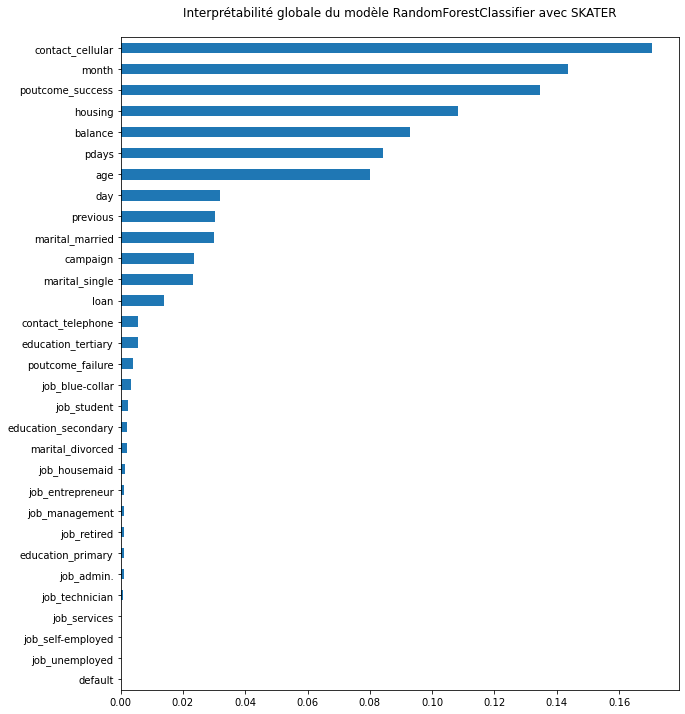

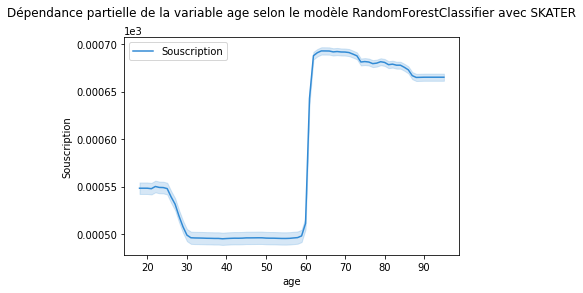

In [47]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.ensemble import RandomForestClassifier
clf_rdf = RandomForestClassifier(n_estimators = 800, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_rdf.fit(X_train, Y_train)

##################### Interprétabilité globale avec la sélection de variables effectuée au préalable ######################

# Explications : 

# Maintenant que nous avons mis en place le modèle de la boîte noire, nous pouvons essayer plusieurs techniques pour 
# comprendre quels sont les principaux moteurs derrière les décisions du modèle. Comme ce modèle est accessible 
# localement, il suffit de créer un objet InMemoryModel. Le seul argument obligatoire pour un InMemoryModel est la 
# fonction de génération de prédiction. Dans notre cas, il s'agit de predict_proba du Keras ANN.
# Nous créons ensuite un objet Interpretation qui transmet les données à la fonction de prédiction. Nous limitons 
# notre interprétation à 11200 échantillons pour calculer l'importance, et nous demandons également que les 
# caractéristiques soient triées par importance dans un ordre croissant.
# La mise en œuvre du calcul de l'importance des attributs est basée sur l'analyse d'importance variable (VIA). 
# Skater utilise différentes techniques selon le type de modèle (par exemple régression, classification multi-classes, 
# etc.), mais il s'appuie généralement sur la mesure de l'entropie dans le changement des prédictions compte tenu d'une 
# perturbation d'une caractéristique. Voir Wei et al. (2015) pour plus de détails.

# Skater est un package prônant l'interprétation globale et locale de toutes formes de modèles, afin d'aider à construire 
# des systèmes de Machine Learning interprétables pour des cas d'utilisation dans le monde réel. Skater utilise uniquement 
# un jeu de données, ainsi qu'une fonction de prédiction entraînée sur ces données pour ces interprétations.

# On utilise X_train.values pour éviter code erreur lié au dataframe pandas
model = InMemoryModel(clf_rdf.predict_proba, examples = X_train.values, target_names = ['Non-souscription', 'Souscription'])
interpreter = Interpretation(X_train.values, feature_names = X_train.columns, training_labels = Y_train)
plots = interpreter.feature_importance.feature_importance(model, n_jobs = -1, ascending = True, n_samples = 11200)
# Affichage des 36 variables les plus importantes du modèle
plots.tail(36).plot.barh(figsize = (10, 12))
plt.title('Interprétabilité globale du modèle RandomForestClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_GLOBALE_RDF_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

############################################### Dépendance partielle ################################################

# Explications : 

# La dépendance partielle décrit l'impact marginal d'une caractéristique sur la prédiction du modèle, 
# en maintenant les autres caractéristiques constantes dans le modèle. La dérivée de la dépendance 
# partielle décrit l'impact d'une caractéristique (analogue à un coefficient de caractéristique dans 
# un modèle de régression).

# Partial Dependence Plot est une autre méthode visuelle, qui est indépendante du modèle et peut être utilisée avec 
# succès pour mieux comprendre le fonctionnement interne d'un modèle de boîte noire comme un ANN profond. Les PDP 
# sont un outil efficace pour évaluer l'effet du changement d'une ou deux caractéristiques sur le résultat du modèle. 
# Ils montrent la dépendance entre la cible et un ensemble de caractéristiques d'entrée, tout en marginalisant les 
# valeurs de toutes les autres caractéristiques.

var = 'age'
interpreter.partial_dependence.plot_partial_dependence([var], model, grid_resolution = 100,
                                                       with_variance = True, figsize = (6, 4))
plt.title('Dépendance partielle de la variable ' + var + ' selon le modèle RandomForestClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_DEPENDANCE_PARTIELLE_' + var + '_RDF_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


## INTERPRETABILITE locale du modèle RandomForestClassifier AVEC SKATER

In [48]:
######################################### Interprétation locale avec LIME ##########################################

# Les explications locales interprétables indépendantes du modèle (LIME, Ribeiro, 2016) sont une autre méthode 
# indépendante du modèle qui peut être utilisée avec des modèles de boîte noire pour expliquer la justification 
# des décisions du modèle. Contrairement aux PDP, cependant, LIME fonctionne à l'échelle locale et l'idée 
# sous-jacente est assez simple. Nous pouvons avoir un classificateur qui a globalement une frontière de décision 
# très complexe, mais si nous nous concentrons sur un seul échantillon, le comportement du modèle dans cette localité 
# spécifique peut généralement être expliqué par un modèle interprétable beaucoup plus simple. 

# Après avoir sélectionné l'échantillon d'intérêt, LIME forme un modèle de substitution en utilisant des perturbations 
# des attributs de l'échantillon sélectionné. Perturber les variables indépendantes avec un peu de bruit et surveiller 
# l'impact sur la variable cible est généralement suffisant pour fournir une bonne explication locale. Le modèle de 
# substitution est souvent un modèle linéaire simple ou un arbre de décision, qui sont interprétables de manière innée, 
# de sorte que les données collectées à partir des perturbations et la sortie de classe correspondante peuvent fournir 
# une bonne indication sur ce qui influence la décision du modèle.

# Skater fournit une implémentation de LIME, accessible via la classe LimeTabularExplainer. Tout ce que nous avons à 
# faire est d'instancier LimeTabularExplainer et de lui donner accès aux données de formation et aux noms de 
# fonctionnalités indépendants.

# Nous reconstruisons le même modèle mais avec des numpy arrays pour éviter les problème avec LIME dû aux noms des 
# features
from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer
from sklearn.ensemble import RandomForestClassifier

clf_rdf = RandomForestClassifier(n_estimators = 800, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_rdf.fit(X_train.values, Y_train)
preds = clf_rdf.predict(X_test)
explicateur = LimeTabularExplainer(X_test.values, feature_names = list(X_test.columns), 
                                   discretize_continuous = False , mode = 'classification',
                                   class_names = ['Non-souscription', 'Souscription'])

# Ensuite, nous choisissons un échantillon pour lequel nous voulons obtenir une explication, disons le treizième 
# échantillon de notre ensemble de données de test (ID d'échantillon 13). Nous appelons les fonctions 
# d'explication_instance à partir de l'explicateur et examinons les classes réelles et prédites, ainsi que 
# l'influence correspondante des attributs individuels sur la prédiction.

# On cherche à savoir le numéro d'indice maximum que l'on peut saisir
print('Dimension de X_test', X_test.shape, '\n\n')
# X_test comprend 2228 lignes. On pourrait faire une boucle for pour tester chacune d'elle, mais trop long
num_index = 1990
# Extraction de la ligne choisie num_index pour afficher les informations du client
print('Le client choisi présente les informations suivantes : \n', pd.DataFrame(X_test.iloc[num_index]), '\n\n')
print('Interprétation locale du modèle RandomForestClassifier selon l index :', num_index, '\n\n')
print ( "Libellé réel : %s" % Y_test.iloc[num_index])
print ( "Prédit : %s" % preds[num_index])
# Application de LIME
explicateur.explain_instance(X_test.iloc[num_index].values, clf_rdf.predict_proba, num_features = 10).show_in_notebook()


C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Dimension de X_test (2228, 31) 


Le client choisi présente les informations suivantes : 
                      4178
age                    37
default                 0
balance                 0
housing                 1
loan                    0
day                     2
month                   6
campaign                1
pdays                  -1
previous                0
job_admin.              1
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         1
marital_single          0
education_primary       0
education_secondary     1
education_tertiary      0
contact_cellular        1
contact_telephone       0
poutcome_failure        0
poutcome_success        0 


Interprétation locale du modèle RandomForestClassifier selon l index : 199

## INTERPRETABILITE globale du modèle StackingClassifier AVEC SKATER

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

[31/31] features ████████████████████ Time elapsed: 51 seconds

2022-04-04 23:45:00,954 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[74/74] grid cells ████████████████████ Time elapsed: 71 seconds

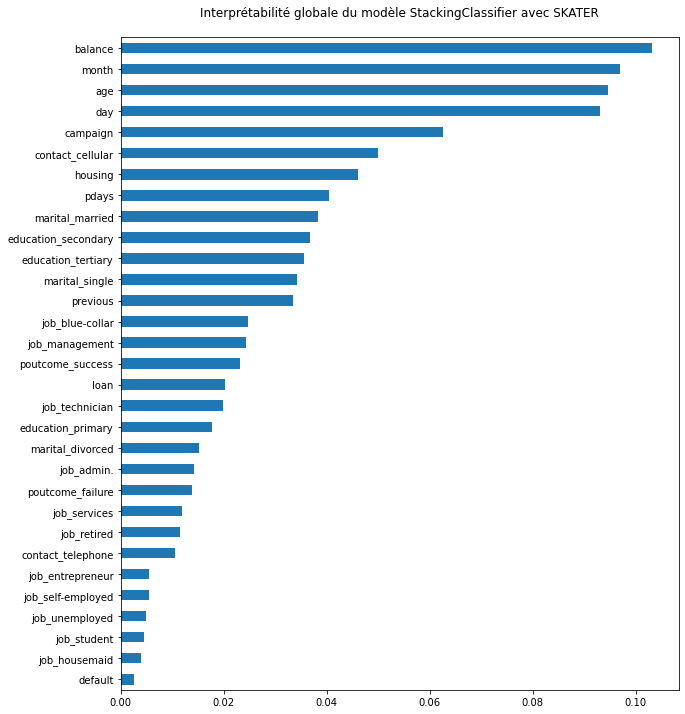

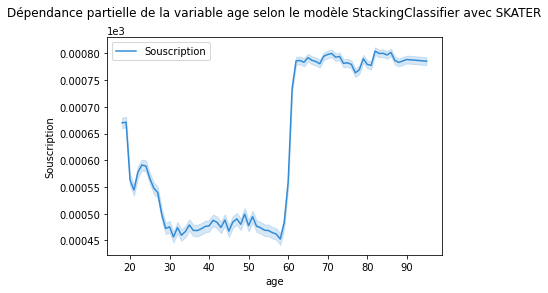

In [49]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# Instanciation de tous les classifieurs
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.1)
clf_random_f = RandomForestClassifier(n_estimators = 800, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_grad_boos = GradientBoostingClassifier(n_estimators = 900, max_depth = 6, learning_rate = 0.1)
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], final_estimator = clf_grad_boos)

sclf.fit(X_train, Y_train)

##################### Interprétabilité globale avec la sélection de variables effectuée au préalable ######################

# Explications : 

# Maintenant que nous avons mis en place le modèle de la boîte noire, nous pouvons essayer plusieurs techniques pour 
# comprendre quels sont les principaux moteurs derrière les décisions du modèle. Comme ce modèle est accessible 
# localement, il suffit de créer un objet InMemoryModel. Le seul argument obligatoire pour un InMemoryModel est la 
# fonction de génération de prédiction. Dans notre cas, il s'agit de predict_proba du Keras ANN.
# Nous créons ensuite un objet Interpretation qui transmet les données à la fonction de prédiction. Nous limitons 
# notre interprétation à 11200 échantillons pour calculer l'importance, et nous demandons également que les 
# caractéristiques soient triées par importance dans un ordre croissant.
# La mise en œuvre du calcul de l'importance des attributs est basée sur l'analyse d'importance variable (VIA). 
# Skater utilise différentes techniques selon le type de modèle (par exemple régression, classification multi-classes, 
# etc.), mais il s'appuie généralement sur la mesure de l'entropie dans le changement des prédictions compte tenu d'une 
# perturbation d'une caractéristique. Voir Wei et al. (2015) pour plus de détails.

# Skater est un package prônant l'interprétation globale et locale de toutes formes de modèles, afin d'aider à construire 
# des systèmes de Machine Learning interprétables pour des cas d'utilisation dans le monde réel. Skater utilise uniquement 
# un jeu de données, ainsi qu'une fonction de prédiction entraînée sur ces données pour ces interprétations.

# On utilise X_train.values pour éviter code erreur lié au dataframe pandas
model = InMemoryModel(sclf.predict_proba, examples = X_train.values, target_names = ['Non-souscription', 'Souscription'])
interpreter = Interpretation(X_train.values, feature_names = X_train.columns, training_labels = Y_train)
plots = interpreter.feature_importance.feature_importance(model, n_jobs = -1, ascending = True, n_samples = 11200)
# Affichage des 36 variables les plus importantes du modèle
plots.tail(36).plot.barh(figsize = (10, 12))
plt.title('Interprétabilité globale du modèle StackingClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_GLOBALE_SCLF_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

############################################### Dépendance partielle ################################################

# Explications : 

# La dépendance partielle décrit l'impact marginal d'une caractéristique sur la prédiction du modèle, 
# en maintenant les autres caractéristiques constantes dans le modèle. La dérivée de la dépendance 
# partielle décrit l'impact d'une caractéristique (analogue à un coefficient de caractéristique dans 
# un modèle de régression).

# Partial Dependence Plot est une autre méthode visuelle, qui est indépendante du modèle et peut être utilisée avec 
# succès pour mieux comprendre le fonctionnement interne d'un modèle de boîte noire comme un ANN profond. Les PDP 
# sont un outil efficace pour évaluer l'effet du changement d'une ou deux caractéristiques sur le résultat du modèle. 
# Ils montrent la dépendance entre la cible et un ensemble de caractéristiques d'entrée, tout en marginalisant les 
# valeurs de toutes les autres caractéristiques.

var = 'age'
interpreter.partial_dependence.plot_partial_dependence([var], model, grid_resolution = 100,
                                                       with_variance = True, figsize = (6, 4))
plt.title('Dépendance partielle de la variable ' + var + ' selon le modèle StackingClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_DEPENDANCE_PARTIELLE_' + var + '_SCLF_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


## INTERPRETABILITE locale du modèle StackingClassifier AVEC SKATER

In [50]:
######################################### Interprétation locale avec LIME ##########################################

# Les explications locales interprétables indépendantes du modèle (LIME, Ribeiro, 2016) sont une autre méthode 
# indépendante du modèle qui peut être utilisée avec des modèles de boîte noire pour expliquer la justification 
# des décisions du modèle. Contrairement aux PDP, cependant, LIME fonctionne à l'échelle locale et l'idée 
# sous-jacente est assez simple. Nous pouvons avoir un classificateur qui a globalement une frontière de décision 
# très complexe, mais si nous nous concentrons sur un seul échantillon, le comportement du modèle dans cette localité 
# spécifique peut généralement être expliqué par un modèle interprétable beaucoup plus simple. 

# Après avoir sélectionné l'échantillon d'intérêt, LIME forme un modèle de substitution en utilisant des perturbations 
# des attributs de l'échantillon sélectionné. Perturber les variables indépendantes avec un peu de bruit et surveiller 
# l'impact sur la variable cible est généralement suffisant pour fournir une bonne explication locale. Le modèle de 
# substitution est souvent un modèle linéaire simple ou un arbre de décision, qui sont interprétables de manière innée, 
# de sorte que les données collectées à partir des perturbations et la sortie de classe correspondante peuvent fournir 
# une bonne indication sur ce qui influence la décision du modèle.

# Skater fournit une implémentation de LIME, accessible via la classe LimeTabularExplainer. Tout ce que nous avons à 
# faire est d'instancier LimeTabularExplainer et de lui donner accès aux données de formation et aux noms de 
# fonctionnalités indépendants.

# Nous reconstruisons le même modèle mais avec des numpy arrays pour éviter les problème avec LIME dû aux noms des 
# features
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# Instanciation de tous les classifieurs
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.1)
clf_random_f = RandomForestClassifier(n_estimators = 800, max_features = 0.5, max_depth = 6, bootstrap = True)
clf_grad_boos = GradientBoostingClassifier(n_estimators = 900, max_depth = 6, learning_rate = 0.1)
sclf = StackingClassifier(estimators = [('LOGISTIC', clf_log), ('RANDOM_FOREST', clf_random_f), 
                                        ('GRADIENT_BOOSTING', clf_grad_boos)], final_estimator = clf_grad_boos)

sclf.fit(X_train.values, Y_train)
preds = sclf.predict(X_test)
explicateur = LimeTabularExplainer(X_test.values, feature_names = list(X_test.columns), 
                                   discretize_continuous = False , mode = 'classification',
                                   class_names = ['Non-souscription', 'Souscription'])

# Ensuite, nous choisissons un échantillon pour lequel nous voulons obtenir une explication, disons le treizième 
# échantillon de notre ensemble de données de test (ID d'échantillon 13). Nous appelons les fonctions 
# d'explication_instance à partir de l'explicateur et examinons les classes réelles et prédites, ainsi que 
# l'influence correspondante des attributs individuels sur la prédiction.

# On cherche à savoir le numéro d'indice maximum que l'on peut saisir
print('Dimension de X_test', X_test.shape, '\n\n')
# X_test comprend 2228 lignes. On pourrait faire une boucle for pour tester chacune d'elle, mais trop long
num_index = 1990
# Extraction de la ligne choisie num_index pour afficher les informations du client
print('Le client choisi présente les informations suivantes : \n', pd.DataFrame(X_test.iloc[num_index]), '\n\n')
print('Interprétation locale du modèle stackingClassifier selon l index :', num_index, '\n\n')
print ( "Libellé réel : %s" % Y_test.iloc[num_index])
print ( "Prédit : %s" % preds[num_index])
# Application de LIME
explicateur.explain_instance(X_test.iloc[num_index].values, clf_rdf.predict_proba, num_features = 10).show_in_notebook()


C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/

Dimension de X_test (2228, 31) 


Le client choisi présente les informations suivantes : 
                      4178
age                    37
default                 0
balance                 0
housing                 1
loan                    0
day                     2
month                   6
campaign                1
pdays                  -1
previous                0
job_admin.              1
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         1
marital_single          0
education_primary       0
education_secondary     1
education_tertiary      0
contact_cellular        1
contact_telephone       0
poutcome_failure        0
poutcome_success        0 


Interprétation locale du modèle stackingClassifier selon l index : 1990 



## INTERPRETABILITE globale du modèle LogisticRegression AVEC SKATER

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

[31/31] features ████████████████████ Time elapsed: 16 seconds

2022-04-04 23:49:47,104 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[74/74] grid cells ████████████████████ Time elapsed: 4 seconds

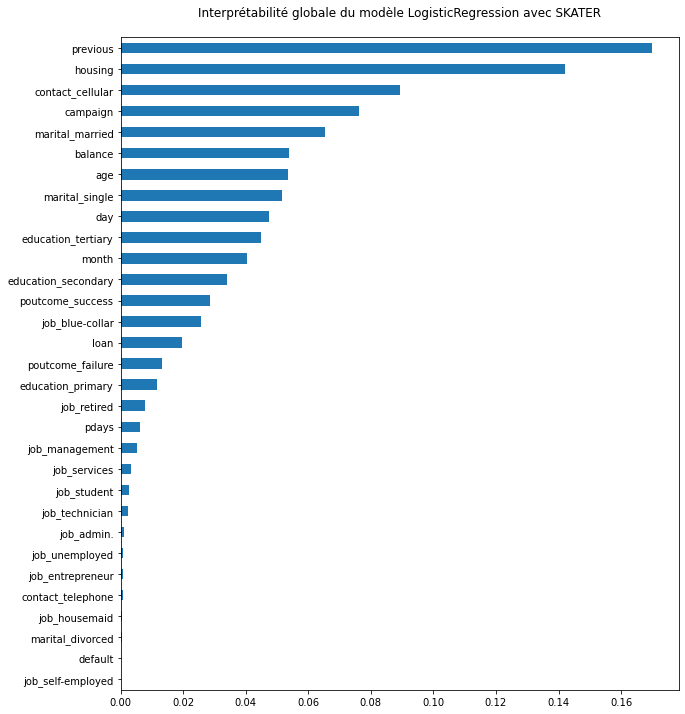

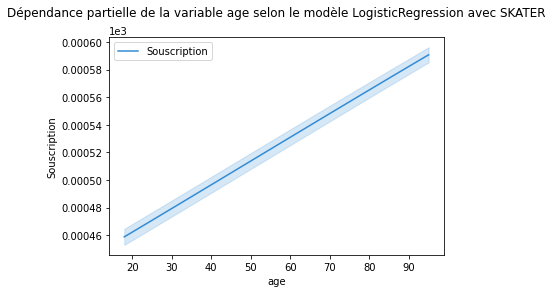

In [51]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.linear_model import LogisticRegression

# Instanciation du classifieur
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.1)

# Entraînement du modèle
clf_log.fit(X_train, Y_train)

##################### Interprétabilité globale avec la sélection de variables effectuée au préalable ######################

# Explications : 

# Maintenant que nous avons mis en place le modèle de la boîte noire, nous pouvons essayer plusieurs techniques pour 
# comprendre quels sont les principaux moteurs derrière les décisions du modèle. Comme ce modèle est accessible 
# localement, il suffit de créer un objet InMemoryModel. Le seul argument obligatoire pour un InMemoryModel est la 
# fonction de génération de prédiction. Dans notre cas, il s'agit de predict_proba du Keras ANN.
# Nous créons ensuite un objet Interpretation qui transmet les données à la fonction de prédiction. Nous limitons 
# notre interprétation à 11200 échantillons pour calculer l'importance, et nous demandons également que les 
# caractéristiques soient triées par importance dans un ordre croissant.
# La mise en œuvre du calcul de l'importance des attributs est basée sur l'analyse d'importance variable (VIA). 
# Skater utilise différentes techniques selon le type de modèle (par exemple régression, classification multi-classes, 
# etc.), mais il s'appuie généralement sur la mesure de l'entropie dans le changement des prédictions compte tenu d'une 
# perturbation d'une caractéristique. Voir Wei et al. (2015) pour plus de détails.

# Skater est un package prônant l'interprétation globale et locale de toutes formes de modèles, afin d'aider à construire 
# des systèmes de Machine Learning interprétables pour des cas d'utilisation dans le monde réel. Skater utilise uniquement 
# un jeu de données, ainsi qu'une fonction de prédiction entraînée sur ces données pour ces interprétations.

# On utilise X_train.values pour éviter code erreur lié au dataframe pandas
model = InMemoryModel(clf_log.predict_proba, examples = X_train.values, target_names = ['Non-souscription', 'Souscription'])
interpreter = Interpretation(X_train.values, feature_names = X_train.columns, training_labels = Y_train)
plots = interpreter.feature_importance.feature_importance(model, n_jobs = -1, ascending = True, n_samples = 11200)
# Affichage des 36 variables les plus importantes du modèle
plots.tail(36).plot.barh(figsize = (10, 12))
plt.title('Interprétabilité globale du modèle LogisticRegression avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_GLOBALE_LOG_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

############################################### Dépendance partielle ################################################

# Explications : 

# La dépendance partielle décrit l'impact marginal d'une caractéristique sur la prédiction du modèle, 
# en maintenant les autres caractéristiques constantes dans le modèle. La dérivée de la dépendance 
# partielle décrit l'impact d'une caractéristique (analogue à un coefficient de caractéristique dans 
# un modèle de régression).

# Partial Dependence Plot est une autre méthode visuelle, qui est indépendante du modèle et peut être utilisée avec 
# succès pour mieux comprendre le fonctionnement interne d'un modèle de boîte noire comme un ANN profond. Les PDP 
# sont un outil efficace pour évaluer l'effet du changement d'une ou deux caractéristiques sur le résultat du modèle. 
# Ils montrent la dépendance entre la cible et un ensemble de caractéristiques d'entrée, tout en marginalisant les 
# valeurs de toutes les autres caractéristiques.

var = 'age'
interpreter.partial_dependence.plot_partial_dependence([var], model, grid_resolution = 100,
                                                       with_variance = True, figsize = (6, 4))
plt.title('Dépendance partielle de la variable ' + var + ' selon le modèle LogisticRegression avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_DEPENDANCE_PARTIELLE_' + var + '_LOG_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


## INTERPRETABILITE locale du modèle LogisticRegression AVEC SKATER

In [52]:
######################################### Interprétation locale avec LIME ##########################################

# Les explications locales interprétables indépendantes du modèle (LIME, Ribeiro, 2016) sont une autre méthode 
# indépendante du modèle qui peut être utilisée avec des modèles de boîte noire pour expliquer la justification 
# des décisions du modèle. Contrairement aux PDP, cependant, LIME fonctionne à l'échelle locale et l'idée 
# sous-jacente est assez simple. Nous pouvons avoir un classificateur qui a globalement une frontière de décision 
# très complexe, mais si nous nous concentrons sur un seul échantillon, le comportement du modèle dans cette localité 
# spécifique peut généralement être expliqué par un modèle interprétable beaucoup plus simple. 

# Après avoir sélectionné l'échantillon d'intérêt, LIME forme un modèle de substitution en utilisant des perturbations 
# des attributs de l'échantillon sélectionné. Perturber les variables indépendantes avec un peu de bruit et surveiller 
# l'impact sur la variable cible est généralement suffisant pour fournir une bonne explication locale. Le modèle de 
# substitution est souvent un modèle linéaire simple ou un arbre de décision, qui sont interprétables de manière innée, 
# de sorte que les données collectées à partir des perturbations et la sortie de classe correspondante peuvent fournir 
# une bonne indication sur ce qui influence la décision du modèle.

# Skater fournit une implémentation de LIME, accessible via la classe LimeTabularExplainer. Tout ce que nous avons à 
# faire est d'instancier LimeTabularExplainer et de lui donner accès aux données de formation et aux noms de 
# fonctionnalités indépendants.

# Nous reconstruisons le même modèle mais avec des numpy arrays pour éviter les problème avec LIME dû aux noms des 
# features
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.linear_model import LogisticRegression

# Instanciation du classifieur
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_log = LogisticRegression(C = 0.1)

# Entraînement du modèle
clf_log.fit(X_train.values, Y_train)
preds = clf_log.predict(X_test)
explicateur = LimeTabularExplainer(X_test.values, feature_names = list(X_test.columns), 
                                   discretize_continuous = False , mode = 'classification',
                                   class_names = ['Non-souscription', 'Souscription'])

# Ensuite, nous choisissons un échantillon pour lequel nous voulons obtenir une explication, disons le treizième 
# échantillon de notre ensemble de données de test (ID d'échantillon 13). Nous appelons les fonctions 
# d'explication_instance à partir de l'explicateur et examinons les classes réelles et prédites, ainsi que 
# l'influence correspondante des attributs individuels sur la prédiction.

# On cherche à savoir le numéro d'indice maximum que l'on peut saisir
print('Dimension de X_test', X_test.shape, '\n\n')
# X_test comprend 2228 lignes. On pourrait faire une boucle for pour tester chacune d'elle, mais trop long
num_index = 1990
# Extraction de la ligne choisie num_index pour afficher les informations du client
print('Le client choisi présente les informations suivantes : \n', pd.DataFrame(X_test.iloc[num_index]), '\n\n')
print('Interprétation locale du modèle LogisticRegression selon l index :', num_index, '\n\n')
print ( "Libellé réel : %s" % Y_test.iloc[num_index])
print ( "Prédit : %s" % preds[num_index])
# Application de LIME
explicateur.explain_instance(X_test.iloc[num_index].values, clf_log.predict_proba, num_features = 10).show_in_notebook()


Dimension de X_test (2228, 31) 


Le client choisi présente les informations suivantes : 
                      4178
age                    37
default                 0
balance                 0
housing                 1
loan                    0
day                     2
month                   6
campaign                1
pdays                  -1
previous                0
job_admin.              1
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         1
marital_single          0
education_primary       0
education_secondary     1
education_tertiary      0
contact_cellular        1
contact_telephone       0
poutcome_failure        0
poutcome_success        0 


Interprétation locale du modèle LogisticRegression selon l index : 1990 



C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


## INTERPRETABILITE globale du modèle GradientBoostingClassifier AVEC SKATER

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
2022-04-04 23:50:18,926 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, 

[31/31] features ████████████████████ Time elapsed: 25 seconds

2022-04-04 23:50:47,984 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[74/74] grid cells ████████████████████ Time elapsed: 24 seconds

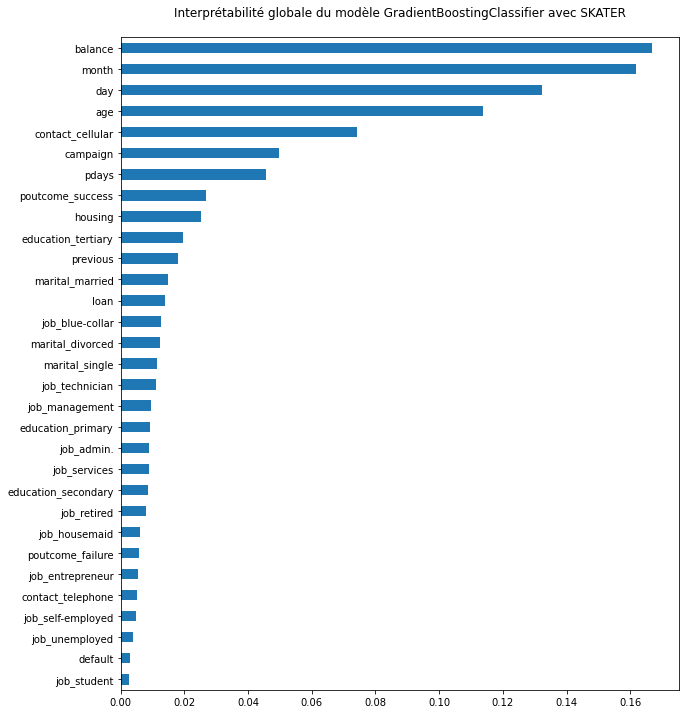

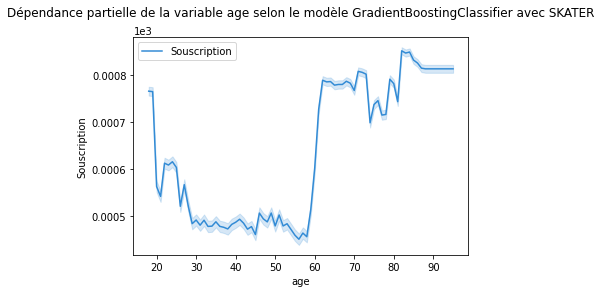

In [53]:
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.ensemble import GradientBoostingClassifier

# Instanciation du classifieur
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_grad = GradientBoostingClassifier(n_estimators = 900, max_depth = 6, learning_rate = 0.1)

# Entraînement du modèle
clf_grad.fit(X_train, Y_train)

##################### Interprétabilité globale avec la sélection de variables effectuée au préalable ######################

# Explications : 

# Maintenant que nous avons mis en place le modèle de la boîte noire, nous pouvons essayer plusieurs techniques pour 
# comprendre quels sont les principaux moteurs derrière les décisions du modèle. Comme ce modèle est accessible 
# localement, il suffit de créer un objet InMemoryModel. Le seul argument obligatoire pour un InMemoryModel est la 
# fonction de génération de prédiction. Dans notre cas, il s'agit de predict_proba du Keras ANN.
# Nous créons ensuite un objet Interpretation qui transmet les données à la fonction de prédiction. Nous limitons 
# notre interprétation à 11200 échantillons pour calculer l'importance, et nous demandons également que les 
# caractéristiques soient triées par importance dans un ordre croissant.
# La mise en œuvre du calcul de l'importance des attributs est basée sur l'analyse d'importance variable (VIA). 
# Skater utilise différentes techniques selon le type de modèle (par exemple régression, classification multi-classes, 
# etc.), mais il s'appuie généralement sur la mesure de l'entropie dans le changement des prédictions compte tenu d'une 
# perturbation d'une caractéristique. Voir Wei et al. (2015) pour plus de détails.

# Skater est un package prônant l'interprétation globale et locale de toutes formes de modèles, afin d'aider à construire 
# des systèmes de Machine Learning interprétables pour des cas d'utilisation dans le monde réel. Skater utilise uniquement 
# un jeu de données, ainsi qu'une fonction de prédiction entraînée sur ces données pour ces interprétations.

# On utilise X_train.values pour éviter code erreur lié au dataframe pandas
model = InMemoryModel(clf_grad.predict_proba, examples = X_train.values, target_names = ['Non-souscription', 'Souscription'])
interpreter = Interpretation(X_train.values, feature_names = X_train.columns, training_labels = Y_train)
plots = interpreter.feature_importance.feature_importance(model, n_jobs = -1, ascending = True, n_samples = 11200)
# Affichage des 36 variables les plus importantes du modèle
plots.tail(36).plot.barh(figsize = (10, 12))
plt.title('Interprétabilité globale du modèle GradientBoostingClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_GLOBALE_GRAD_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")

############################################### Dépendance partielle ################################################

# Explications : 

# La dépendance partielle décrit l'impact marginal d'une caractéristique sur la prédiction du modèle, 
# en maintenant les autres caractéristiques constantes dans le modèle. La dérivée de la dépendance 
# partielle décrit l'impact d'une caractéristique (analogue à un coefficient de caractéristique dans 
# un modèle de régression).

# Partial Dependence Plot est une autre méthode visuelle, qui est indépendante du modèle et peut être utilisée avec 
# succès pour mieux comprendre le fonctionnement interne d'un modèle de boîte noire comme un ANN profond. Les PDP 
# sont un outil efficace pour évaluer l'effet du changement d'une ou deux caractéristiques sur le résultat du modèle. 
# Ils montrent la dépendance entre la cible et un ensemble de caractéristiques d'entrée, tout en marginalisant les 
# valeurs de toutes les autres caractéristiques.

var = 'age'
interpreter.partial_dependence.plot_partial_dependence([var], model, grid_resolution = 100,
                                                       with_variance = True, figsize = (6, 4))
plt.title('Dépendance partielle de la variable ' + var + ' selon le modèle GradientBoostingClassifier avec SKATER\n');

# Enregistrement de la figure dans le répertoire courant
filename = 'INTERPRETABILITE_DEPENDANCE_PARTIELLE_' + var + '_GRAD_SKATER.png'
plt.savefig(filename, dpi = 600, bbox_inches = "tight")


## INTERPRETABILITE locale du modèle GradientBoostingClassifier AVEC SKATER

In [54]:
######################################### Interprétation locale avec LIME ##########################################

# Les explications locales interprétables indépendantes du modèle (LIME, Ribeiro, 2016) sont une autre méthode 
# indépendante du modèle qui peut être utilisée avec des modèles de boîte noire pour expliquer la justification 
# des décisions du modèle. Contrairement aux PDP, cependant, LIME fonctionne à l'échelle locale et l'idée 
# sous-jacente est assez simple. Nous pouvons avoir un classificateur qui a globalement une frontière de décision 
# très complexe, mais si nous nous concentrons sur un seul échantillon, le comportement du modèle dans cette localité 
# spécifique peut généralement être expliqué par un modèle interprétable beaucoup plus simple. 

# Après avoir sélectionné l'échantillon d'intérêt, LIME forme un modèle de substitution en utilisant des perturbations 
# des attributs de l'échantillon sélectionné. Perturber les variables indépendantes avec un peu de bruit et surveiller 
# l'impact sur la variable cible est généralement suffisant pour fournir une bonne explication locale. Le modèle de 
# substitution est souvent un modèle linéaire simple ou un arbre de décision, qui sont interprétables de manière innée, 
# de sorte que les données collectées à partir des perturbations et la sortie de classe correspondante peuvent fournir 
# une bonne indication sur ce qui influence la décision du modèle.

# Skater fournit une implémentation de LIME, accessible via la classe LimeTabularExplainer. Tout ce que nous avons à 
# faire est d'instancier LimeTabularExplainer et de lui donner accès aux données de formation et aux noms de 
# fonctionnalités indépendants.

# Nous reconstruisons le même modèle mais avec des numpy arrays pour éviter les problème avec LIME dû aux noms des 
# features
from skater.model import InMemoryModel
from skater.core.explanations import Interpretation
from sklearn.ensemble import GradientBoostingClassifier

# Instanciation du classifieur
# On met les meilleurs paramètres retenus dans les modèles précédents
clf_grad = GradientBoostingClassifier(n_estimators = 900, max_depth = 6, learning_rate = 0.1)

# Entraînement du modèle
clf_grad.fit(X_train, Y_train)
preds = clf_grad.predict(X_test)
explicateur = LimeTabularExplainer(X_test.values, feature_names = list(X_test.columns), 
                                   discretize_continuous = False , mode = 'classification',
                                   class_names = ['Non-souscription', 'Souscription'])

# Ensuite, nous choisissons un échantillon pour lequel nous voulons obtenir une explication, disons le treizième 
# échantillon de notre ensemble de données de test (ID d'échantillon 13). Nous appelons les fonctions 
# d'explication_instance à partir de l'explicateur et examinons les classes réelles et prédites, ainsi que 
# l'influence correspondante des attributs individuels sur la prédiction.

# On cherche à savoir le numéro d'indice maximum que l'on peut saisir
print('Dimension de X_test', X_test.shape, '\n\n')
# X_test comprend 2228 lignes. On pourrait faire une boucle for pour tester chacune d'elle, mais trop long
num_index = 1990
# Extraction de la ligne choisie num_index pour afficher les informations du client
print('Le client choisi présente les informations suivantes : \n', pd.DataFrame(X_test.iloc[num_index]), '\n\n')
print('Interprétation locale du modèle GradientBoostingClassifier selon l index :', num_index, '\n\n')
print ( "Libellé réel : %s" % Y_test.iloc[num_index])
print ( "Prédit : %s" % preds[num_index])
# Application de LIME
explicateur.explain_instance(X_test.iloc[num_index].values, clf_grad.predict_proba, num_features = 10).show_in_notebook()


Dimension de X_test (2228, 31) 


Le client choisi présente les informations suivantes : 
                      4178
age                    37
default                 0
balance                 0
housing                 1
loan                    0
day                     2
month                   6
campaign                1
pdays                  -1
previous                0
job_admin.              1
job_blue-collar         0
job_entrepreneur        0
job_housemaid           0
job_management          0
job_retired             0
job_self-employed       0
job_services            0
job_student             0
job_technician          0
job_unemployed          0
marital_divorced        0
marital_married         1
marital_single          0
education_primary       0
education_secondary     1
education_tertiary      0
contact_cellular        1
contact_telephone       0
poutcome_failure        0
poutcome_success        0 


Interprétation locale du modèle GradientBoostingClassifier selon l index :

C:\Users\Nesrine\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
